<div class="alert alert-info">
    
# FINAL PROJECT: 
**Analysis of user behavior in a mobile application for selling of used and unneeded stuff**

<div style="border:solid green 2px; padding: 20px">
    
In the app **"Thrifted Stuff"**, users sell their unneeded things by posting them on the bulletin board. It is necessary to conduct a study of the service audience on the logs of user events in the application, committed after 07.10.2019.

**The purpose of the study** is to analyze the impact of different events on the occurrence of the target contacts_show event, to evaluate which events are more likely to be committed by users who view contacts on the ad page. Based on user segmentation, determine how the app can be improved in terms of customer experience. 

**Research Objectives:**
- To identify user segments based on committing events.
- To investigate which users tend to return to the mobile app more often.
- To investigate which users are more likely to commit a target event (conversion to a target action).
- Test statistical hypotheses about the difference in conversion rates across different sources of app downloads; the difference in conversion rates to contact views between users who perform tips_show and tips_click events and those who perform only tips_show. 

Data source - 2 datasets: one with user actions in the app, the other with data on app download sources.
    
**Dataset mobile_dataset.csv contains columns:**
- event.time - time of occurrence
- event.name - event name
- user.id - user id

**Dataset mobile_sources.csv contains columns:**
- userId - user id
- source - source from which the user installed the application

**Events:**
- advert_open - opening the ad card
- photos_show - viewing photos in the ad
- tips_show - user saw recommended ads
- tips_click - user clicked on a recommended ad
- contacts_show and show_contacts - user clicked on the "see phone number" button on the ad card
- contacts_call - the user called the phone number on the ad card
- map - the user opened the map of placed ads
- search_1 - search_7 - different events related to site search
- favorites_add - add ad to favorites

<div class="alert alert-success">

## 1 Downloading files and data familiarization

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action = 'ignore')
import numpy as np
from scipy import stats as st
import math as mth
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# read the csv files and save them to variables and getting general information about datasets
df = pd.read_csv('mobile_dataset.csv')

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
6,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
7,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
8,2019-10-07 00:01:49.732803,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
9,2019-10-07 00:01:54.958298,advert_open,020292ab-89bc-4156-9acf-68bc2783f894


In [3]:
sourсes = pd.read_csv('mobile_sourсes.csv')

sourсes.info()
sourсes.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
5,17f6b2db-2964-4d11-89d8-7e38d2cb4750,yandex
6,62aa104f-592d-4ccb-8226-2ba0e719ded5,yandex
7,57321726-5d66-4d51-84f4-c797c35dcf2b,google
8,c2cf55c0-95f7-4269-896c-931d14deaab5,google
9,48e614d6-fe03-40f7-bf9e-4c4f61c19f64,yandex


In [4]:
# number of unique users in the first dataset
df['user.id'].nunique()

4293

In [5]:
# distribution of unique values of event.name and source columns
print(df['event.name'].value_counts())
sourсes['source'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event.name, dtype: int64


yandex    1934
other     1230
google    1129
Name: source, dtype: int64

In [6]:
# checking for duplicate strings
print(df.duplicated().sum())
sourсes.duplicated().sum()

0


0

<div style="border:solid green 2px; padding: 20px">
    
- The dataset with logs contains 3 columns and 74197 rows. Dataset with sources contains 2 columns and 4293 rows. 
- There are no missing values or duplicates in both datasets. 
- The first dataset has a column with date and time in object format. 
- In the event view there are options contacts_show and show_contacts, although they are the same thing.
- The unique number of users in the first dataset is 4293, as is the number of rows in the second dataset. But it is better to check if they are the same users or not.

<div class="alert alert-success">

## 2 Data preprocessing

In [7]:
# converting a column with date and time to the required format
df['event.time'] = pd.to_datetime(df['event.time'], format='%Y-%m-%d %H:%M:%S.%f')

In [8]:
# minimum and maximum dates in the dataset
print(df['event.time'].min())
print(df['event.time'].max())

2019-10-07 00:00:00.431357
2019-11-03 23:58:12.532487


In [9]:
# renaming "show_contacts" to "contacts_show" values
df['event.name'] = df['event.name'].replace('show_contacts', 'contacts_show')
df['event.name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event.name, dtype: int64

In [10]:
# duplicate check after renaming
df.duplicated().sum()

0

In [11]:
# renaming columns for better readability
df.columns = df.columns.str.replace('.', '_')
sourсes.columns = ['user_id', 'source']

In [12]:
# merge datasets by user_id
df = df.merge(sourсes, on='user_id', how='left')
df.head()

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


In [13]:
len(df)

74197

<div style="border:solid green 2px; padding: 20px">
    
- The length of the dataset remained the same after the merge. So, the unique user_id values in the datasets are the same.
- The dataset contains data from October 7 through November 3, 2019.
- The most common event type is tips_show (user saw recommended ads). It was performed 40055 times.

<div class="alert alert-success">

## 3 Exploratory data analysis

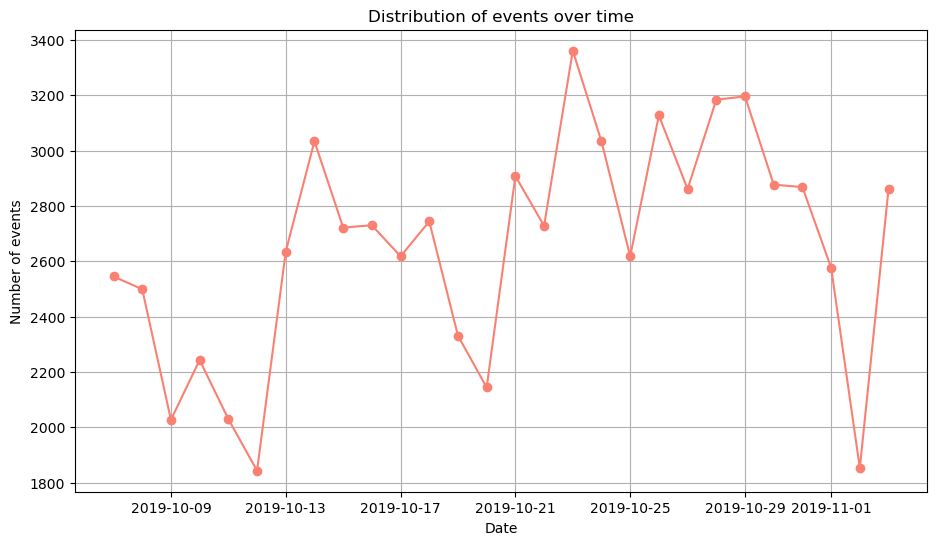

In [14]:
# grouping data by date and counting the number of events
events_by_date = df.groupby(df['event_time'].dt.date)['event_time'].count()

# plotting a graph
plt.figure(figsize=(11, 6))
events_by_date.plot(kind='line', marker='o', color='salmon')
plt.title('Distribution of events over time')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.grid(True)
plt.show()

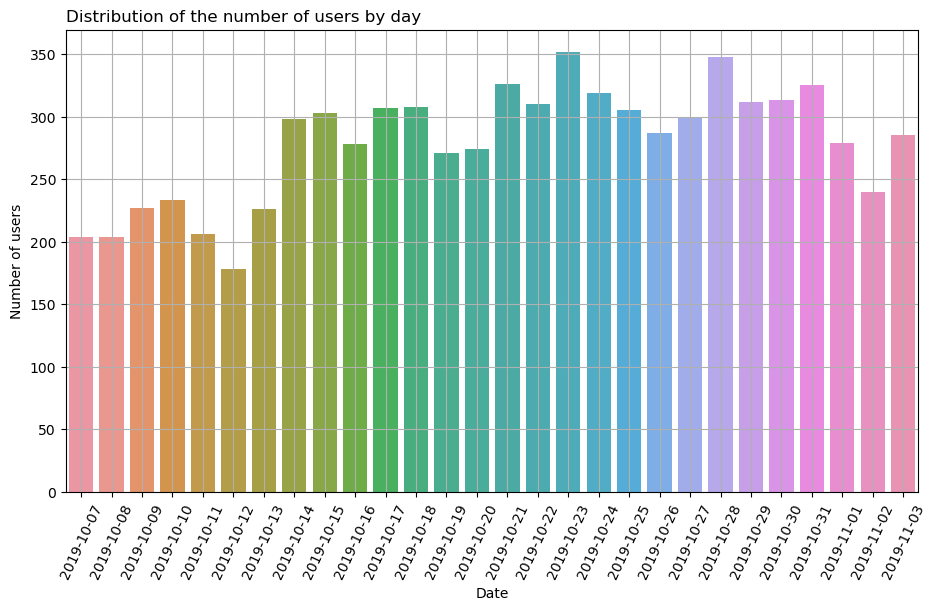

In [15]:
# grouping data by date and counting the number of users
users_by_date = df.groupby(df['event_time'].dt.date)['user_id'].nunique().reset_index()

# plotting a graph
plt.figure(figsize=(11, 6))
sns.barplot(x='event_time', y='user_id', data=users_by_date) 
plt.title('Distribution of the number of users by day', loc = 'left') 
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation= 65)
#plt.subplots_adjust(wspace=2, hspace=2)
plt.grid(True)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- The number of events during one day ranges from 1830 to 3380. The least number of user actions was made on October 9, 11-12, and November 2. The most actions were performed on October 14, 23-24, 26, 28-29.
- The most users logged into the app on Oct. 23 and Oct. 28 - about 350 users. The least number of users were in the app on October 12 - about 177 users, as well as on October 7-8 and 11 - a little more than 200 users per day.

In [16]:
# grouping data by users and events
grouped_df = df.groupby(['user_id', 'event_name'])['event_time'].count().reset_index()

# grouping data by events and calculation of maximum, minimum, mean and median values
summary_df = grouped_df.groupby('event_name')['event_time'].agg(['min', 'max', 'mean', 'median']).reset_index()

# renaming columns for clarity
summary_df.columns = ['event_name', 'min_count', 'max_count', 'mean_count', 'median_count']

summary_df

,event_name,min_count,max_count,mean_count,median_count
0,advert_open,1,137,8.207723,4.0
1,contacts_call,1,17,2.539906,2.0
2,contacts_show,1,137,4.616718,2.0
3,favorites_add,1,63,4.037037,2.0
4,map,1,71,2.665522,1.0
5,photos_show,1,177,9.143379,5.0
6,search_1,1,68,4.454892,3.0
7,search_2,1,23,1.338843,1.0
8,search_3,1,21,2.509615,2.0
9,search_4,1,35,1.478903,1.0


In [17]:
# calculate the following metrics to determine how many users on average use the app per day and per week:
# DAU (daily active users) — number of unique users per day
# WAU (weekly active users) — number of unique users per week
df['event_date'] = df['event_time'].dt.date.astype('datetime64')
df['event_week'] = df['event_time'].dt.week
DAU = df.groupby('event_date').agg({'user_id': 'nunique'}).mean()
WAU = df.groupby('event_week').agg({'user_id': 'nunique'}).mean()
print(f'Average number of unique users per day: {DAU}')
print(f'Average number of unique users per week: {WAU}')

Average number of unique users per day: user_id    279.178571
dtype: float64
Average number of unique users per week: user_id    1382.5
dtype: float64


In [18]:
# calculation of the average number of events per user per day and per week
print('Average number of events per user per day:', 
      df.groupby('event_date').agg({'user_id': 'count'}).mean() / 
      df.groupby('event_date').agg({'user_id': 'nunique'}).mean())

print('Average number of events per user per week:', 
      df.groupby('event_week').agg({'user_id': 'count'}).mean() / 
      df.groupby('event_week').agg({'user_id': 'nunique'}).mean())

Average number of events per user per day: user_id    9.491749
dtype: float64
Average number of events per user per week: user_id    13.417179
dtype: float64


<div style="border:solid green 2px; padding: 20px">
    
- The tips_show action was most often performed, and the photos_show event was performed less often. There is a very large difference between the mean and median of all events, indicating the presence of outliers.
- On average, the app was visited by about 279 users per day and about 1382 per week. 
- One user averaged about 9 actions per day and about 13 per week.

In [19]:
# grouping of all events by user
events_count = df.groupby('user_id')[['event_name']].count().reset_index()
events_count.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.97, 0.98, 0.99])

,event_name
count,4293.000000
mean,17.283252
std,29.130677
min,1.000000
5%,3.000000
25%,5.000000
50%,9.000000
75%,17.000000
90%,36.000000
95%,59.000000


<div style="border:solid green 2px; padding: 20px">
    The average number of events per user is 17.28 and the median is 9. Such a large difference between these values indicates the presence of abnormal values. 75% percentile equals 17 events, 90% percentile equals 36, 95% percentile equals 59, 99% percentile equals 132, and the maximum number of events per user equals 478. The maximum value is an outlier, however if this user is removed, the dataset will lose 478 events, which is 11.13% of the number of events by user, which is too many. Let's take a closer look at the actions of this overactive user, as well as users who have only 1 event.

In [20]:
# allocation of users with 1 event to a separate dataframe
pd.set_option('display.max_rows', None)
single_event_users = df[df['user_id'].isin(events_count[events_count['event_name'] == 1]['user_id'])]
single_event_users

,event_time,event_name,user_id,source,event_date,event_week
685,2019-10-07 12:56:48.260671,tips_show,af23f38a-cfa8-4e82-83d9-4914c11c1bdb,yandex,2019-10-07,41
916,2019-10-07 14:30:22.990928,tips_show,a328c7d1-ff5b-41df-822a-bccb105fb408,google,2019-10-07,41
4256,2019-10-08 16:48:44.466164,map,3f3b2abf-f9fa-40fc-9319-3578ed857391,yandex,2019-10-08,41
4379,2019-10-08 18:22:19.509042,search_1,d64a7f4f-bebe-4893-8b44-683ea136b86b,other,2019-10-08,41
5903,2019-10-09 13:38:51.658132,contacts_show,5f2607e8-5f7e-476e-9ef4-f17a26afe6c8,other,2019-10-09,41
6214,2019-10-09 15:52:42.980257,map,e5199366-ab59-44c1-9d52-e20cf23cbc5e,other,2019-10-09,41
9644,2019-10-11 11:01:37.729360,tips_show,8bc67b38-7e6d-4084-b354-58b30d8f1e6d,google,2019-10-11,41
9892,2019-10-11 12:23:25.907020,map,5bfdb95a-9d12-4436-b371-22754434d0d4,google,2019-10-11,41
10591,2019-10-11 16:46:49.111461,tips_show,28d03e3b-15af-467e-b492-930231df1f37,yandex,2019-10-11,41
11843,2019-10-12 13:17:59.559503,tips_show,b64837e2-93a8-435b-8ca5-c209e2f81c12,other,2019-10-12,41


<div style="border:solid green 2px; padding: 20px">
    There are 65 users in the dataset who have committed only 1 single event. These users logged into the application on almost all dates that are in the dataset. Source is also of all three types. The event types are also different and there is no pattern.  Thus, the users who committed 1 event have nothing in common. Their number is about 1.5% of all unique users, so they can be removed as they are not important for further analysis.

In [21]:
# creating a dataset without users who performed 1 action
df_filtered = df[~df['user_id'].isin(single_event_users['user_id'])]
len(df_filtered)

74132

In [22]:
# counting the number of users whose number of events is greater than or equal to 132
events_count[events_count['event_name'] >= 132].shape[0]

44

<div style="border:solid green 2px; padding: 20px">
    Forty-four users have the number of in-app actions equal to or greater than the 99th percentile. If these users are deleted, the dataset will lose about 18% of all events. This is too high a proportion, so we should not delete these users.

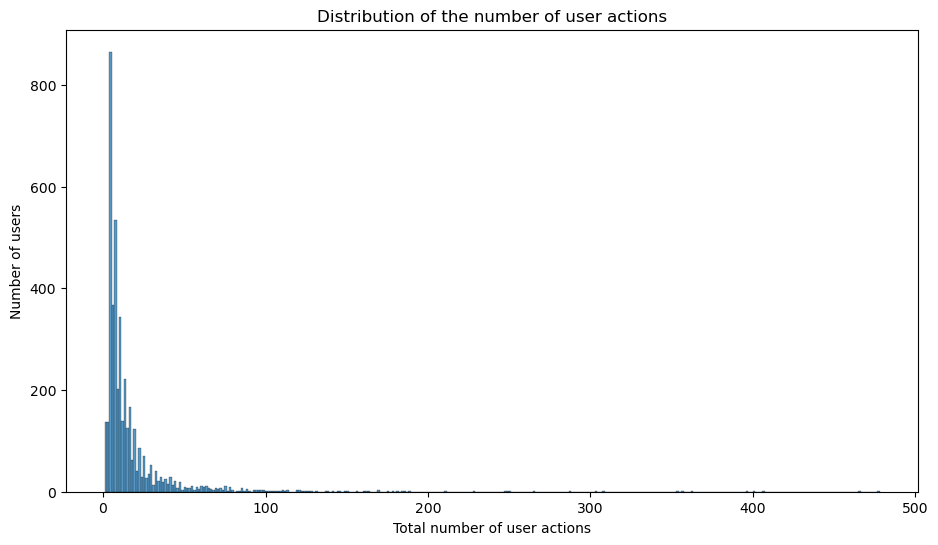

In [23]:
# plotting a graph of number of actions by user
plt.figure(figsize=(11, 6))
sns.histplot(events_count['event_name'])
plt.title('Distribution of the number of user actions')
plt.xlabel('Total number of user actions')
plt.ylabel('Number of users')

plt.show()

<div style="border:solid green 2px; padding: 20px">
    Due to the large number of outliers, the histogram is not sufficiently informative. Most often a user performs 3-15 actions in the application.

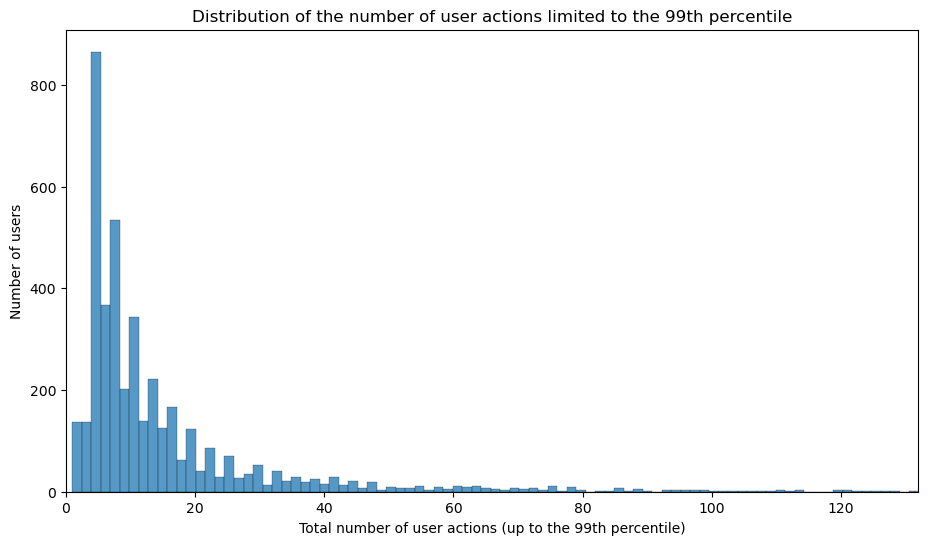

In [24]:
# histogram construction with limitation by 99th percentile
plt.figure(figsize=(11, 6))
ax = sns.histplot(events_count['event_name'])

# x-axis limit setting
ax.set_xlim(left=0, right=132)

plt.title('Distribution of the number of user actions limited to the 99th percentile')
plt.xlabel('Total number of user actions (up to the 99th percentile)')
plt.ylabel('Number of users')

plt.show()

<div style="border:solid green 2px; padding: 20px">
    Now the histogram is much more informative. The majority of users made 4 to 7 actions in the application. Also a significant share of users have performed from 8 to 20 actions. And there are very few users who have made more than 50 actions.

In [25]:
all_users = df['user_id'].nunique()
print('Unique users:', all_users)

Unique users: 4293


In [26]:
# creating a list of users who have performed a targeted action
targeted_action_users = df_filtered.query('event_name =="contacts_show"')['user_id'].unique()
targeted_action_users_list = list(targeted_action_users)
print('Number of users who took a targeted action:', len(targeted_action_users_list))
print()
print('Which is', format(len(targeted_action_users_list)/all_users*100, '.2f'),'% of the total number of users')

Number of users who took a targeted action: 975

Which is 22.71 % of the total number of users


In [27]:
# checking the relationship between user activity and the target action
df_filtered.query('user_id == @targeted_action_users_list').groupby('user_id')['event_name'].count().describe()

count    975.000000
mean      27.888205
std       47.648189
min        2.000000
25%        7.000000
50%       13.000000
75%       27.500000
max      478.000000
Name: event_name, dtype: float64

In [28]:
df_filtered.query('user_id != @targeted_action_users_list').groupby('user_id')['event_name'].count().describe()

count    3253.000000
mean       14.430065
std        19.819956
min         2.000000
25%         5.000000
50%         8.000000
75%        15.000000
max       407.000000
Name: event_name, dtype: float64

<div style="border:solid green 2px; padding: 20px">
    Overall, we can say that users who took a targeted action were more active in using the app. Their average number of events was 27.89, while in the group that did not perform the target action - 14.43 events. The median number of events in the group that performed the target action was 13, and in the group that did not perform the target action - 8 events. The 75th percentile is 27.5, and among users without a target event it is 15 events. The maximum value among the users who committed the target event is 478 and the others have 407 events.

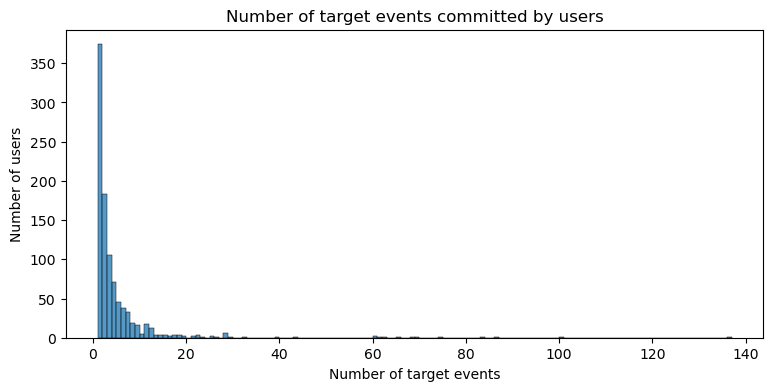

In [29]:
# counting the number of target events that users have performed
contacts_show_users = df_filtered.query('event_name == "contacts_show"').groupby('user_id')['event_name'].count().reset_index()

# plotting a graph of number of target events by user
plt.figure(figsize=(9, 4))
sns.histplot(contacts_show_users['event_name'], binwidth=1)
plt.title('Number of target events committed by users')
plt.xlabel('Number of target events')
plt.ylabel('Number of users')

plt.show()

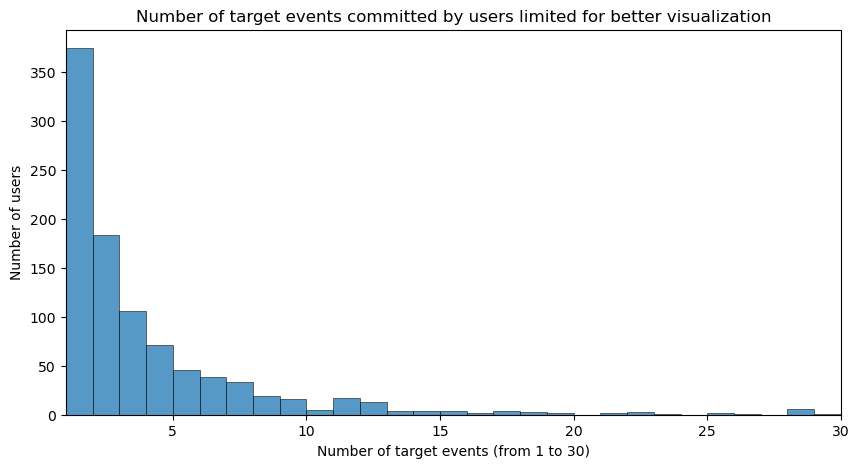

In [30]:
# histogram plotting with x-axis constraint for better visualization
plt.figure(figsize=(10, 5))
ax = sns.histplot(contacts_show_users['event_name'], binwidth=1)

# x-axis limit setting
ax.set_xlim(left=1, right=30)

plt.title('Number of target events committed by users limited for better visualization')
plt.xlabel('Number of target events (from 1 to 30)')
plt.ylabel('Number of users')

plt.show()

<div style="border:solid green 2px; padding: 20px">
    There are a lot of anomalous values in the number of target events per user, as well as in the number of all events. But we cannot remove them, because it also shows the behavior of users. Most users (about 370) performed a target action 1 time, about 180 users - 2 times, about 110 users - 3 times, about 70 users - 4 times. Between 5 and 7 target actions were performed by 40-50 users each.

In [31]:
# distribution of users who performed the target action by source
df_filtered[df_filtered['event_name'] == 'contacts_show'].groupby('source')['user_id'].nunique()

source
google    274
other     225
yandex    476
Name: user_id, dtype: int64

<div style="border:solid green 2px; padding: 20px">
    The distribution of users who committed a target event in the application by source type is roughly the same as the distribution of all users. Therefore, at first glance, it cannot be said that the source affects the execution of the target action.

<div class="alert alert-success">
    
## 4 Allocating user sessions

<div style="border:solid green 2px; padding: 20px">

To generate user profiles, we need to prepare session data - a series of actions in the application performed during a single visit.
    
Most researchers believe that the timeout between different sessions in such mobile applications is 30 minutes. Therefore, we will take the gap of 30 minutes as a gap to distinguish the sessions.

In [32]:
# sorting the dataframe by event time and users
df_filtered = df_filtered.sort_values(['user_id', 'event_time'])

# differentiating the 30-minute pause in sessions for each group of events and finding the cumulative amount
session = ((df_filtered.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum())

# creating a new session_id column 
df_filtered['session_id'] = df_filtered.groupby(['user_id', session], sort=False).ngroup() + 1
df_filtered.head(10)

,event_time,event_name,user_id,source,event_date,event_week,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
831,2019-10-07 13:45:43.212340,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
832,2019-10-07 13:46:31.033718,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
836,2019-10-07 13:47:32.860234,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
839,2019-10-07 13:49:41.716617,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,1
6541,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-09,41,2


In [33]:
# creating a dataframe with sessions
sessions_full = df_filtered.groupby(['user_id', 'session_id']).agg(
    session_start=('event_time', 'first'),
    session_end=('event_time', 'last'),
    events_count=('event_name', 'count')
).reset_index()

# assigning session number for each user
sessions_full['session_num'] = sessions_full.groupby('user_id').cumcount() + 1

# dropping the session_id column
sessions_full = sessions_full.drop(columns='session_id')

# aggregating data by session number for each user
sessions_full = sessions_full.groupby(['user_id', 'session_num']).agg(
    session_start=('session_start', 'first'),
    session_end=('session_end', 'last'),
    events_count=('events_count', 'sum')
).reset_index()

# creating a dataframe for the very first event for each user
user_start = df_filtered.groupby('user_id').agg({'event_time':'first'}).reset_index()
user_start.rename(columns={'event_time':'first_visit'}, inplace=True)

# joining user_start dataframe to session data
sessions_full = sessions_full.merge(user_start, on='user_id', how='left')

# calculation of the Lifetime for each session in days
sessions_full['lifetime'] = (sessions_full['session_start'] - sessions_full['first_visit']).dt.days

# saving the day of the visit separately in the application
sessions_full['dt'] = sessions_full['first_visit'].dt.date

# session duration - as the interval between the first and the last event in the session
sessions_full['duration'] = sessions_full.session_end - sessions_full.session_start

# length display in minutes
sessions_full['duration'] = sessions_full['duration'].dt.total_seconds() / 60

sessions_full.head(10)

,user_id,session_num,session_start,session_end,events_count,first_visit,lifetime,dt,duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9,2019-10-07 13:39:45.989359,0,2019-10-07,9.928788
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,4,2019-10-07 13:39:45.989359,2,2019-10-07,8.456433
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,14,2019-10-07 13:39:45.989359,14,2019-10-07,14.987868
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,8,2019-10-07 13:39:45.989359,14,2019-10-07,12.636196
4,00157779-810c-4498-9e05-a1e9e3cedf93,1,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,9,2019-10-19 21:34:33.849769,0,2019-10-19,25.346455
5,00157779-810c-4498-9e05-a1e9e3cedf93,2,2019-10-20 18:49:24.115634,2019-10-20 20:05:36.234073,18,2019-10-19 21:34:33.849769,0,2019-10-19,76.201974
6,00157779-810c-4498-9e05-a1e9e3cedf93,3,2019-10-24 10:50:40.219833,2019-10-24 10:57:12.675110,9,2019-10-19 21:34:33.849769,4,2019-10-19,6.540921
7,00157779-810c-4498-9e05-a1e9e3cedf93,4,2019-10-29 21:18:24.850073,2019-10-29 22:10:25.712840,20,2019-10-19 21:34:33.849769,9,2019-10-19,52.014379
8,00157779-810c-4498-9e05-a1e9e3cedf93,5,2019-10-30 07:50:45.948358,2019-10-30 08:26:53.933176,14,2019-10-19 21:34:33.849769,10,2019-10-19,36.133080
9,00157779-810c-4498-9e05-a1e9e3cedf93,6,2019-11-03 17:12:09.708771,2019-11-03 17:12:09.708771,1,2019-10-19 21:34:33.849769,14,2019-10-19,0.000000


In [34]:
print('The number of sessions in the dataset:', len(sessions_full))

The number of sessions in the dataset: 10303


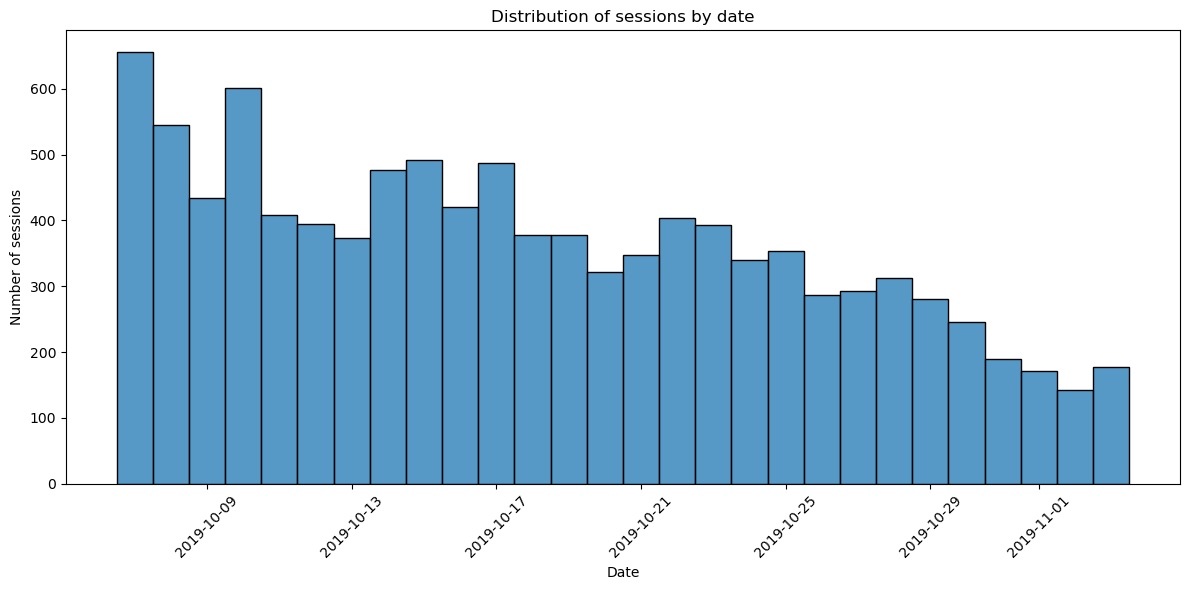

In [35]:
# plotting of distribution by dates for sessions
plt.figure(figsize=(12, 6))
sns.histplot(data=sessions_full, x='dt')
plt.title('Distribution of sessions by date')
plt.xlabel('Date')
plt.ylabel('Number of sessions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# general information about Lifetime Sessions
sessions_full['lifetime'].describe()

count    10303.000000
mean         3.150927
std          5.294476
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max         26.000000
Name: lifetime, dtype: float64

In [37]:
# general information about number of events in a session
sessions_full['events_count'].describe()

count    10303.000000
mean         7.195186
std          9.598757
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max        149.000000
Name: events_count, dtype: float64

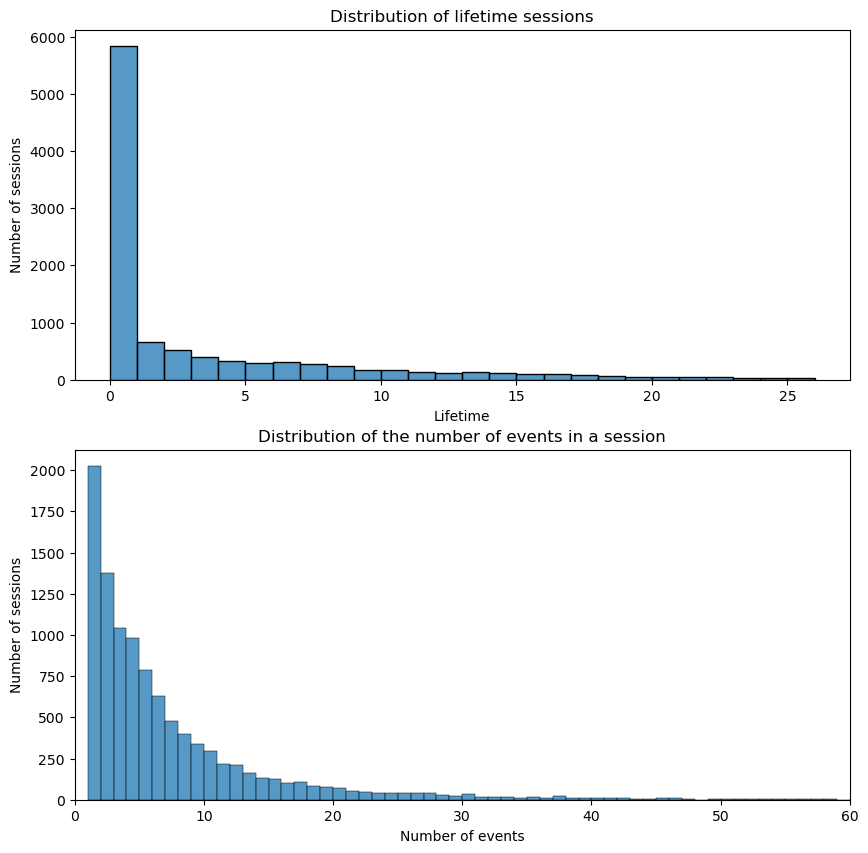

In [38]:
# construction of histograms of the distribution of sessions' lifetimes and the number of events during one session
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.histplot(sessions_full['lifetime'], ax=axes[0], binwidth=1)
axes[0].set_title('Distribution of lifetime sessions')
axes[0].set_xlabel('Lifetime')
axes[0].set_ylabel('Number of sessions')

sns.histplot(sessions_full['events_count'], ax=axes[1], binwidth=1) 
axes[1].set_title('Distribution of the number of events in a session')
axes[1].set_xlabel('Number of events')
axes[1].set_ylabel('Number of sessions')
axes[1].set_xlim(0, 60)  # setting the x-axis limit to 60 for better clarity

plt.show()

In [39]:
# define for each user the total time in the application and the average time per session
sessions_full.groupby(['user_id'])['duration'].agg({'sum', 'mean'}).reset_index().describe()

,mean,sum
count,4228.000000,4228.000000
mean,14.477998,31.579430
std,15.746101,63.124788
min,0.000000,0.000000
25%,4.216415,6.341427
50%,9.559893,15.501253
75%,19.351764,33.619517
max,161.014863,1684.760138


In [40]:
print("Number of sessions with zero duration:", (sessions_full['duration'] == 0).sum())

Number of sessions with zero duration: 2023


In [41]:
# checking information on null sessions
print(sessions_full[sessions_full['duration'] == 0]['events_count'].describe())
sessions_full[sessions_full['duration'] == 0]['lifetime'].describe()

count    2023.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: events_count, dtype: float64


count    2023.000000
mean        4.528423
std         6.010875
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max        26.000000
Name: lifetime, dtype: float64

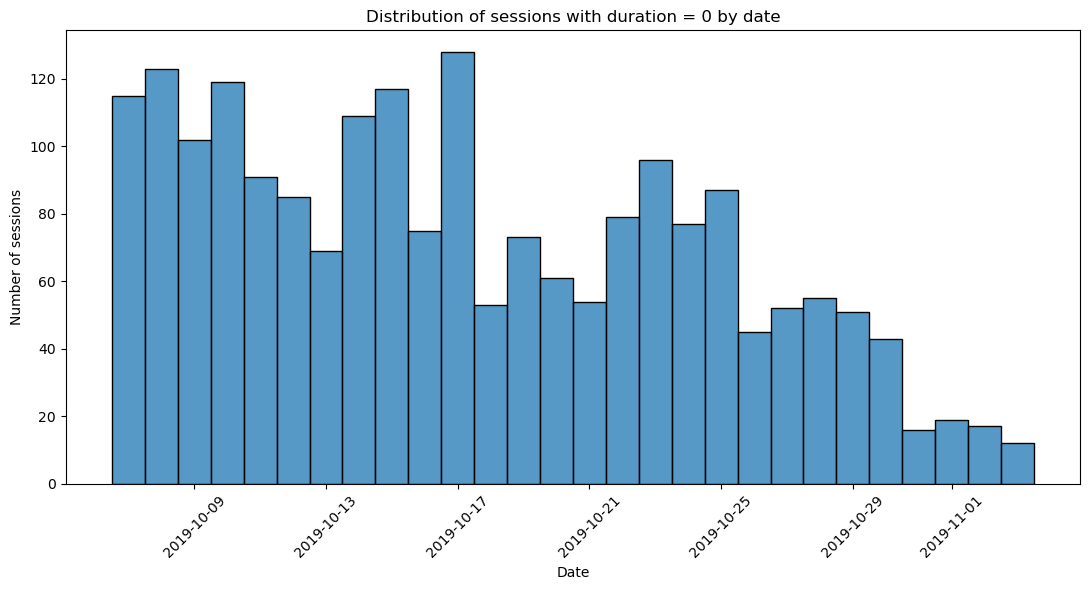

In [42]:
# plotting of distribution by dates for sessions with duration equal to 0
plt.figure(figsize=(11, 6))
sns.histplot(data=sessions_full[sessions_full['duration'] == 0], x='dt')
plt.title('Distribution of sessions with duration = 0 by date')
plt.xlabel('Date')
plt.ylabel('Number of sessions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- When we set the timeout between sessions to 30 minutes, we allocated 10303 sessions to 4228 users.
- In general, the number of sessions per day tends to decrease over the selected period. However, there is an increase in the number of sessions at the beginning of each weekly cycle (Monday-Thursday). On Friday and weekends there are always fewer sessions.
- Most sessions are committed on the first day of using the app. This is evidenced by the fact that in the 'lifetime' column the first quartile and median are 0, and the third quartile is 5 days. The average value is 3.15 due to outliers (the maximum value is 26 days).
- There are also outliers in the number of events in one session - the maximum value is 149 events, while the third quartile is 9 events. The median is 4 events.
- About 5800 sessions (more than half of all sessions) have a lifetime of 0. Between 200 and 500 sessions (per lifetime) have a lifetime of 1 to 7 days.
- More than 2000 sessions have a number of events equal to 1. Two events contain about 1630 sessions, 3-4 events each contains about 1000 sessions (for each number of events). 5 events contains about 750 sessions. 
- The median time spent by a user in the app is 15.5 minutes (with the mean being 31.58 minutes, almost twice as long). The median value of time per session is 9.56 minutes (the average is 14.48 minutes). This difference between the mean and median arose due to users spending a very long time in the app. The maximum amount of time in the app is 1684.76 minutes (this is more than 28 hours) and the maximum session time is 161 minutes.
- Meanwhile, there are 2023 sessions with zero duration in the dataset, which is 19.64% of all sessions. These sessions occurred throughout the entire period that is in the dataset (more at the beginning of the period than at the end). Perhaps there was a technical error, or the user immediately closed the application after opening it. Despite the fact that such sessions are quite numerous in the dataset, they can hinder further analysis because they can distort the information. Therefore, it is better to delete these sessions for the purity of the analysis.

In [43]:
# creating a new dataset without sessions with zero duration
sessions = sessions_full[sessions_full['duration'] != 0].copy()
print(sessions.groupby(['user_id'])['duration'].agg({'sum', 'mean'}).reset_index().describe())
len(sessions)

              mean          sum
count  4210.000000  4210.000000
mean     15.958992    31.714449
std      16.670382    63.225760
min       0.000200     0.000200
25%       5.039885     6.414303
50%      10.833326    15.592906
75%      21.363671    33.727926
max     217.496673  1684.760138


8280

<div class="alert alert-success">

## 5 Creating user profiles

In [44]:
# convert the first_visit column to datetime format and extract only the date into a separate column
sessions['first_visit_date'] = pd.to_datetime(sessions['first_visit']).dt.date

# creation of retention table - pivot table with the date of the first visit
retention = sessions.pivot_table(index=['first_visit_date'], columns='lifetime', values='user_id', aggfunc='nunique').reset_index()
retention

lifetime,first_visit_date,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,2019-10-07,189.0,19.0,15.0,19.0,8.0,6.0,12.0,12.0,9.0,...,3.0,7.0,4.0,2.0,3.0,5.0,6.0,8.0,6.0,5.0
1,2019-10-08,160.0,21.0,16.0,9.0,6.0,9.0,6.0,8.0,7.0,...,4.0,3.0,3.0,4.0,1.0,2.0,4.0,3.0,3.0,2.0
2,2019-10-09,159.0,10.0,7.0,7.0,5.0,10.0,7.0,10.0,8.0,...,1.0,2.0,4.0,2.0,5.0,1.0,1.0,4.0,3.0,NaN
3,2019-10-10,165.0,13.0,17.0,9.0,15.0,12.0,10.0,8.0,12.0,...,8.0,4.0,5.0,2.0,2.0,3.0,1.0,2.0,NaN,NaN
4,2019-10-11,124.0,9.0,11.0,10.0,9.0,8.0,9.0,3.0,1.0,...,7.0,4.0,3.0,2.0,4.0,4.0,2.0,NaN,NaN,NaN
5,2019-10-12,117.0,13.0,18.0,6.0,7.0,9.0,10.0,8.0,7.0,...,4.0,3.0,2.0,1.0,6.0,3.0,NaN,NaN,NaN,NaN
6,2019-10-13,136.0,15.0,10.0,8.0,8.0,6.0,3.0,6.0,6.0,...,2.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
7,2019-10-14,168.0,15.0,16.0,14.0,9.0,11.0,6.0,3.0,10.0,...,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-10-15,170.0,16.0,11.0,12.0,7.0,8.0,10.0,8.0,9.0,...,5.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-10-16,150.0,17.0,10.0,4.0,8.0,9.0,6.0,8.0,7.0,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# cohort size calculation
cohort_sizes = (sessions.groupby('first_visit_date').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))

# merging cohort sizes and retention table
retention_rate = cohort_sizes.merge(retention, on='first_visit_date', how='left').fillna(0)

# index reset after merging
retention_rate = retention_rate.reset_index()

# splitting the retention table data into cohort sizes
retention_rate.iloc[:, 2:] = retention_rate.iloc[:, 2:].div(retention_rate['cohort_size'], axis=0)

# deleting the 'cohort_size' and index columns
retention_rate.drop(columns=['cohort_size'], inplace=True)
retention_rate.drop(columns=['index'], inplace=True)
retention_rate

,first_visit_date,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,2019-10-07,0.940299,0.094527,0.074627,0.094527,0.039801,0.029851,0.059701,0.059701,0.044776,...,0.014925,0.034826,0.019900,0.009950,0.014925,0.024876,0.029851,0.039801,0.029851,0.024876
1,2019-10-08,0.975610,0.128049,0.097561,0.054878,0.036585,0.054878,0.036585,0.048780,0.042683,...,0.024390,0.018293,0.018293,0.024390,0.006098,0.012195,0.024390,0.018293,0.018293,0.012195
2,2019-10-09,0.924419,0.058140,0.040698,0.040698,0.029070,0.058140,0.040698,0.058140,0.046512,...,0.005814,0.011628,0.023256,0.011628,0.029070,0.005814,0.005814,0.023256,0.017442,0.000000
3,2019-10-10,0.948276,0.074713,0.097701,0.051724,0.086207,0.068966,0.057471,0.045977,0.068966,...,0.045977,0.022989,0.028736,0.011494,0.011494,0.017241,0.005747,0.011494,0.000000,0.000000
4,2019-10-11,0.932331,0.067669,0.082707,0.075188,0.067669,0.060150,0.067669,0.022556,0.007519,...,0.052632,0.030075,0.022556,0.015038,0.030075,0.030075,0.015038,0.000000,0.000000,0.000000
5,2019-10-12,0.943548,0.104839,0.145161,0.048387,0.056452,0.072581,0.080645,0.064516,0.056452,...,0.032258,0.024194,0.016129,0.008065,0.048387,0.024194,0.000000,0.000000,0.000000,0.000000
6,2019-10-13,0.957746,0.105634,0.070423,0.056338,0.056338,0.042254,0.021127,0.042254,0.042254,...,0.014085,0.014085,0.014085,0.007042,0.007042,0.000000,0.000000,0.000000,0.000000,0.000000
7,2019-10-14,0.928177,0.082873,0.088398,0.077348,0.049724,0.060773,0.033149,0.016575,0.055249,...,0.022099,0.005525,0.011050,0.005525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2019-10-15,0.944444,0.088889,0.061111,0.066667,0.038889,0.044444,0.055556,0.044444,0.050000,...,0.027778,0.022222,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2019-10-16,0.914634,0.103659,0.060976,0.024390,0.048780,0.054878,0.036585,0.048780,0.042683,...,0.012195,0.006098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
# create a copy of the retention_rate dataframe to p;ot a heatmap
retention_rate_copy1 = retention_rate.copy()

# deleting the first_visit_date column
retention_rate_copy1 = retention_rate_copy1.drop(columns=['first_visit_date'])

# creating a new column with dates in the format "07 Oct" in order up to "03 Nov"
start_date = pd.to_datetime('2019-10-07')
end_date = pd.to_datetime('2019-11-03')
dates = [start_date + pd.Timedelta(days=i) for i in range(28)]
date_strings = [date.strftime('%d %b') for date in dates]

# adding a new column to a dataframe
retention_rate_copy1['first_visit'] = date_strings
cols = list(retention_rate_copy1.columns)
cols = [cols[-1]] + cols[:-1]
retention_rate_copy1 = retention_rate_copy1[cols]

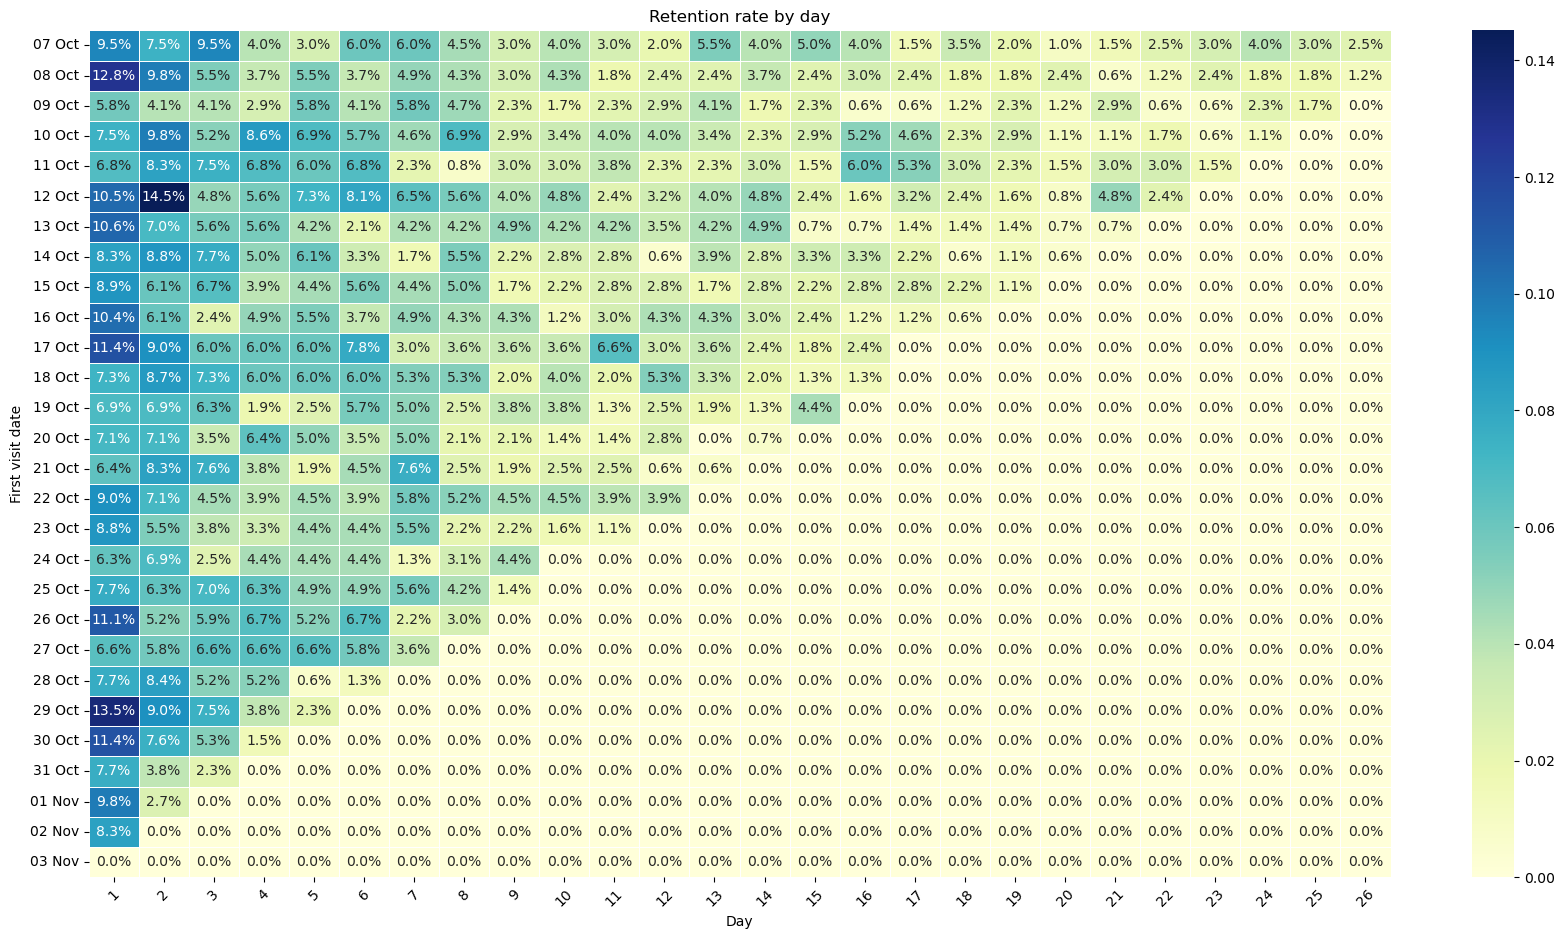

In [47]:
# deletion of the first column with the first day of lifetime, where retention rate is 100% for better visibility heatmap
retention_rate_copy1 = retention_rate_copy1.drop(columns=[0])

# heat map of retention
plt.figure(figsize=(21, 11))
sns.heatmap(retention_rate_copy1.set_index('first_visit'), cmap="YlGnBu", annot=True, fmt=".1%", linewidths=.5)
plt.title('Retention rate by day')
plt.xlabel('Day')
plt.ylabel('First visit date')
plt.xticks(rotation=45)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- In general, on day 7, no more than 8.1% of the number of users on the first day remain in the app, which is quite low for an app of this type. Perhaps the developers should think about changing the interface or additional functionality in the app.
- The maximum retention rate on the seventh day of Lifetime at 8.1% in the October 12 cohort, and on the eighth day - in the October 21 cohort - 7.6%. The October 17 cohort had a retention rate of 7.8% on the seventh day of Lifetime, and 6.8% in the October 11 cohort. 
- The lowest retention rate on the last days of the seven-day Lifetime in the October 28 and October 13 cohorts.
- Overall for the 7-day period, the best retention rates are in the October 7, 8, 12, 15, and 17 cohorts.

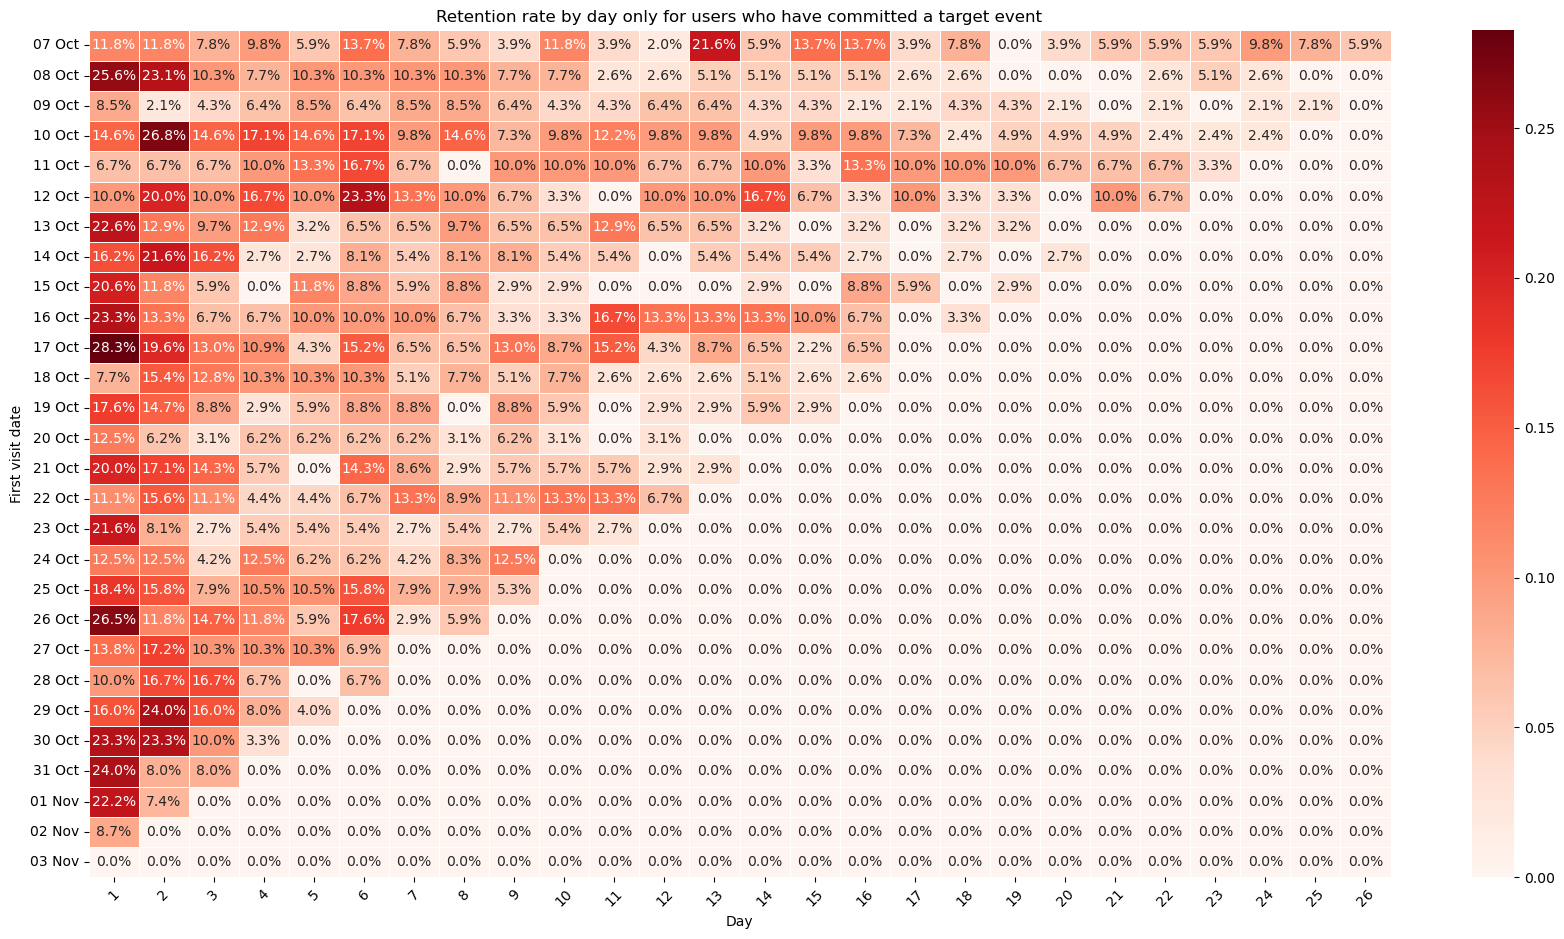

In [48]:
# creation of retention table only for users who have committed a target event
retention_targeted_action = sessions[sessions['user_id'].isin(targeted_action_users_list)].pivot_table(index=['first_visit_date'], columns='lifetime', values='user_id', aggfunc='nunique').reset_index()

# cohort size calculation
cohort_sizes_targeted_action = (sessions[sessions['user_id'].isin(targeted_action_users_list)].groupby('first_visit_date')
                .agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))

# merging cohort sizes and retention table
retention_rate_targeted_action = cohort_sizes_targeted_action.merge(retention_targeted_action, on='first_visit_date', how='left').fillna(0)

# index reset after merging
retention_rate_targeted_action = retention_rate_targeted_action.reset_index()

# splitting the retention table data into cohort sizes
retention_rate_targeted_action.iloc[:, 2:] = retention_rate_targeted_action.iloc[:, 2:].div(retention_rate_targeted_action['cohort_size'], axis=0)

# deleting the cohort_size and index columns
retention_rate_targeted_action.drop(columns=['cohort_size'], inplace=True)
retention_rate_targeted_action.drop(columns=['index'], inplace=True)

# deleting the first_visit_date column
retention_rate_targeted_action = retention_rate_targeted_action.drop(columns=['first_visit_date'])

# creating a new column with dates in the format "07 Oct" in order up to "03 Nov"
start_date = pd.to_datetime('2019-10-07')
end_date = pd.to_datetime('2019-11-03')
dates = [start_date + pd.Timedelta(days=i) for i in range(28)]
date_strings = [date.strftime('%d %b') for date in dates]

# adding a new column to a dataframe
retention_rate_targeted_action['first_visit'] = date_strings
cols = list(retention_rate_targeted_action.columns)
cols = [cols[-1]] + cols[:-1]
retention_rate_targeted_action = retention_rate_targeted_action[cols]

# deletion of the first column with the first day of lifetime, where retention rate is 100% for better visibility heatmap
retention_rate_targeted_action = retention_rate_targeted_action.drop(columns=[0])

# heat map of retention for users who have committed a target event
plt.figure(figsize=(21, 11))
sns.heatmap(retention_rate_targeted_action.set_index('first_visit'), cmap="Reds", annot=True, fmt=".1%", linewidths=.5)
plt.title('Retention rate by day only for users who have committed a target event')
plt.xlabel('Day')
plt.ylabel('First visit date')
plt.xticks(rotation=45)
plt.show()

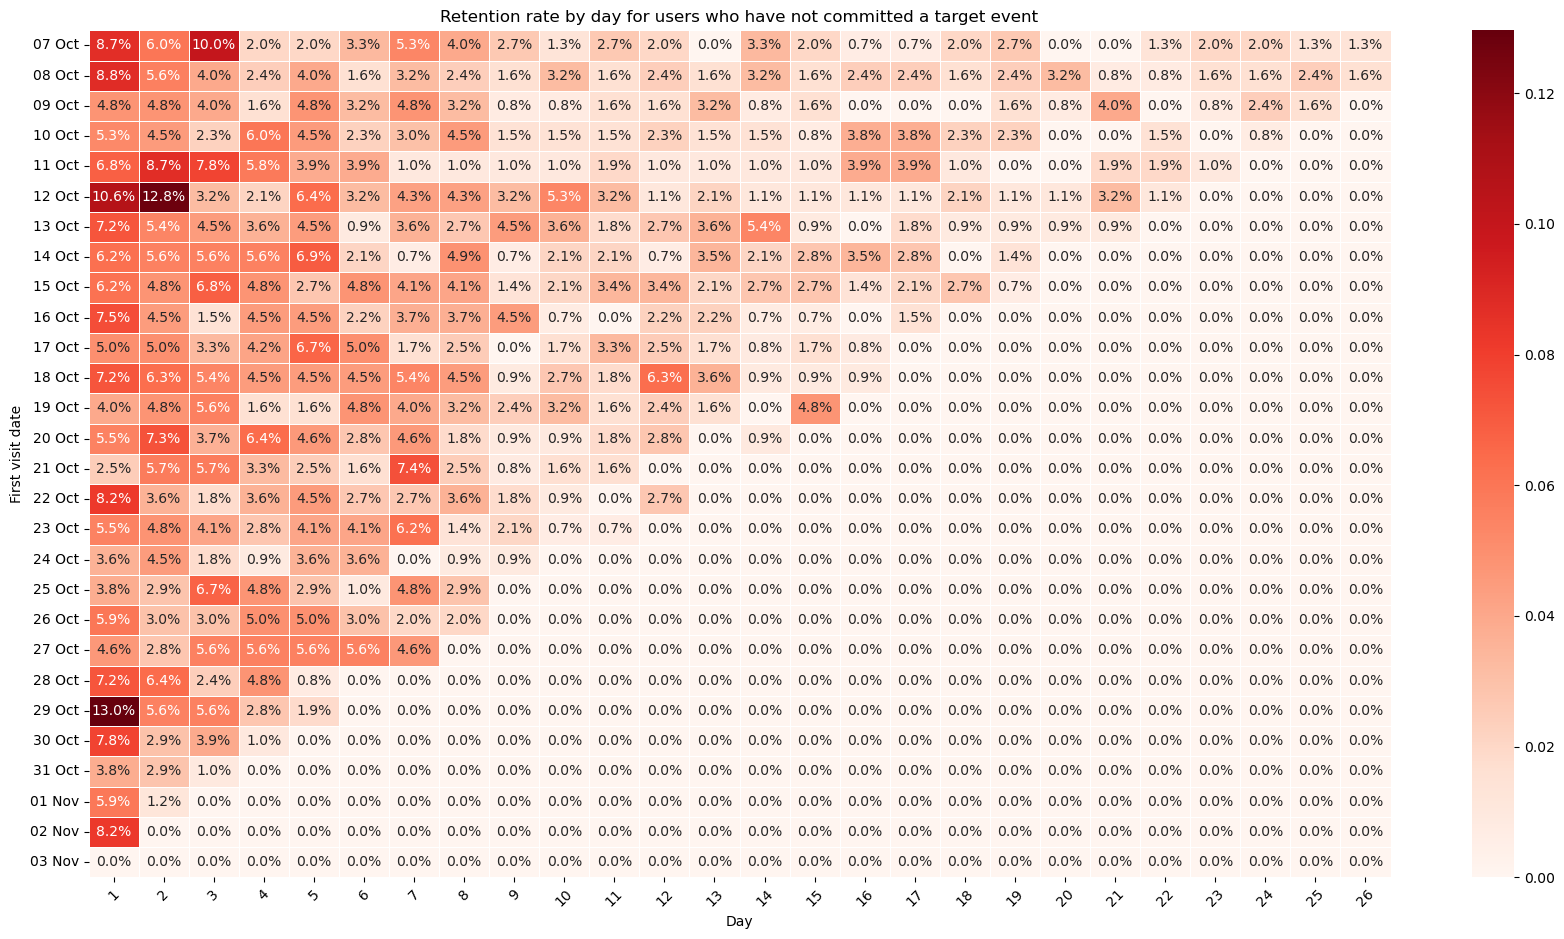

In [49]:
# creation of retention table for users who have not committed a target event
retention_other_users = sessions[~sessions['user_id'].isin(targeted_action_users_list)].pivot_table(index=['first_visit_date'], columns='lifetime', values='user_id', aggfunc='nunique').reset_index()

# cohort size calculation
cohort_sizes_other_users = (sessions[~sessions['user_id'].isin(targeted_action_users_list)].groupby('first_visit_date')
                .agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))

# merging cohort sizes and retention table
retention_rate_other_users = cohort_sizes_other_users.merge(retention_other_users, on='first_visit_date', how='left').fillna(0)

# index reset after merging
retention_rate_other_users = retention_rate_other_users.reset_index()

# splitting the retention table data into cohort sizes
retention_rate_other_users.iloc[:, 2:] = retention_rate_other_users.iloc[:, 2:].div(retention_rate_other_users['cohort_size'], axis=0)

# deleting the cohort_size and index columns
retention_rate_other_users.drop(columns=['cohort_size'], inplace=True)
retention_rate_other_users.drop(columns=['index'], inplace=True)

# deleting the first_visit_date column
retention_rate_other_users = retention_rate_other_users.drop(columns=['first_visit_date'])

# creating a new column with dates in the format "07 Oct" in order up to "03 Nov"
start_date = pd.to_datetime('2019-10-07')
end_date = pd.to_datetime('2019-11-03')
dates = [start_date + pd.Timedelta(days=i) for i in range(28)]
date_strings = [date.strftime('%d %b') for date in dates]

# adding a new column to a dataframe
retention_rate_other_users['first_visit'] = date_strings
cols = list(retention_rate_other_users.columns)
cols = [cols[-1]] + cols[:-1]
retention_rate_other_users = retention_rate_other_users[cols]

# deletion of the first column with the first day of lifetime, where retention rate is 100% for better visibility heatmap
retention_rate_other_users = retention_rate_other_users.drop(columns=[0])

# heat map of retention for users who have not committed a target event
plt.figure(figsize=(21, 11))
sns.heatmap(retention_rate_other_users.set_index('first_visit'), cmap="Reds", annot=True, fmt=".1%", linewidths=.5)
plt.title('Retention rate by day for users who have not committed a target event')
plt.xlabel('Day')
plt.ylabel('First visit date')
plt.xticks(rotation=45)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- Users who made a target event in the app have a much higher retention rate than users who didn't. And the retention rate is higher throughout the whole 7-day lifetime.
- For users who committed a targeted action, this rate on day 7 ranges from 5.4% to 23.3%, with the high rates being higher. In the first days of the Lifetime, this indicator reaches 28.3%.
- The rest of the users have a much lower rate: on the seventh day it ranges from 0.9% to 5.6%. At the same time, even in the first days of Lifetime, the maximum retention rate is only 13%.

In [50]:
# creating a new sources dataset with unique user_id and source pairs
sources = df_filtered.drop_duplicates(subset=['user_id', 'source'])

# saving only the user_id and source columns in the dataset
sources = sources.loc[:, ['user_id', 'source']]

# compiling user profiles with the number of sessions in each user's application, their total duration, the number 
# of actions on average per session, as well as information on whether the user performed a targeted action - browsing through 
# the seller's contacts and from what source the user installed the application
users_profiles = sessions.groupby('user_id').agg({'session_num' : 'max', 
                                                  'duration':'sum', 
                                                  'events_count':'mean'}).reset_index()

# adding information about the source of the application installation
users_profiles = users_profiles.merge(sources, on='user_id', how='left')
users_profiles.head(10)

,user_id,session_num,duration,events_count,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,46.009285,8.750000,other
1,00157779-810c-4498-9e05-a1e9e3cedf93,5,196.236810,14.000000,yandex
2,00463033-5717-4bf1-91b4-09183923b9df,1,24.707917,10.000000,yandex
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,6,110.739310,5.333333,google
4,00551e79-152e-4441-9cf7-565d7eb04090,2,9.327742,3.500000,yandex
5,00554293-7e00-4122-b898-4e892c4a7c53,2,7.047807,5.500000,yandex
6,005fbea5-2678-406f-88a6-fbe9787e2268,1,10.802260,5.000000,yandex
7,00653802-5ff1-4071-bc17-347fc4cef569,1,8.506064,5.000000,google
8,006a32d4-ee10-40dc-b237-11e0fde81cbc,1,15.689247,6.000000,yandex
9,006f6ced-225b-4f9c-9f17-23404bc6835f,1,9.076371,5.000000,yandex


In [51]:
# for each event create a column with a sign whether the user committed it or not
for event in list(df_filtered['event_name'].unique()):
    event_users = list(df_filtered[df_filtered['event_name'] == event]['user_id'].unique())
    users_profiles[event] = False
    for user in event_users:
        users_profiles.loc[users_profiles['user_id'] == user, event] = True

users_profiles.head()

,user_id,session_num,duration,events_count,source,tips_show,map,search_1,photos_show,favorites_add,contacts_show,contacts_call,advert_open,search_7,search_5,search_4,search_6,search_3,tips_click,search_2
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,46.009285,8.750000,other,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,00157779-810c-4498-9e05-a1e9e3cedf93,5,196.236810,14.000000,yandex,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False
2,00463033-5717-4bf1-91b4-09183923b9df,1,24.707917,10.000000,yandex,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,6,110.739310,5.333333,google,True,True,False,False,False,False,False,True,True,True,True,True,True,False,False
4,00551e79-152e-4441-9cf7-565d7eb04090,2,9.327742,3.500000,yandex,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False


In [52]:
# general information on numeric columns users_profiles
users_profiles.describe(percentiles=[0.05, 0.25, 0.50, 0.90, 0.95, 0.99])

,session_num,duration,events_count
count,4210.000000,4210.000000,4210.000000
mean,2.273634,31.714449,8.984852
std,3.423216,63.225760,8.508980
min,1.000000,0.000200,2.000000
5%,1.000000,1.339860,2.500000
25%,1.000000,6.414303,4.000000
50%,1.000000,15.592906,6.000000
90%,4.000000,67.287200,17.500000
95%,6.000000,113.431446,24.546667
99%,15.000000,254.208468,43.000000


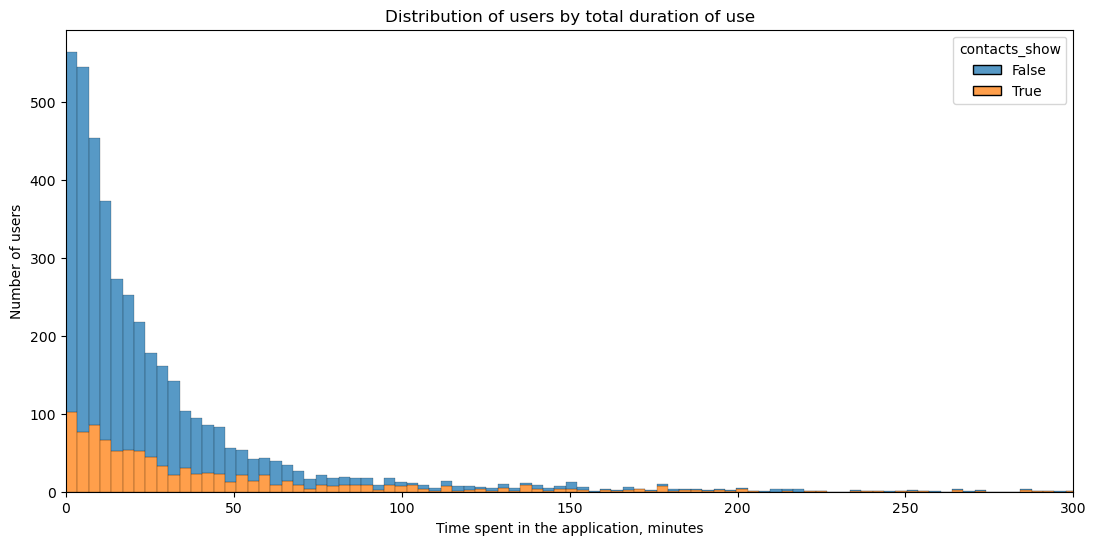

In [53]:
# construction of a histogram with distribution of total time in the application by users
plt.figure(figsize = (13, 6))
sns.histplot(x='duration', data=users_profiles, hue= 'contacts_show', multiple='stack')
plt.xlabel('Time spent in the application, minutes')
plt.ylabel('Number of users')
plt.title('Distribution of users by total duration of use')
plt.xlim(0, 300)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    In general, the distribution of time spent in the app by users who did and did not commit a target event is similar. However, in the group who committed the target event, the graph decreases more smoothly and the "tail" with more time in the application is longer than in the group without the target action. The most frequent users spent up to three minutes in the app, as well as the majority of users spent up to 12 minutes in the app. At the same time, in the group of those who made a target action, the majority of users stayed in the application longer - up to 30 minutes. Thus, users who committed the target event spent more time in the application on average.

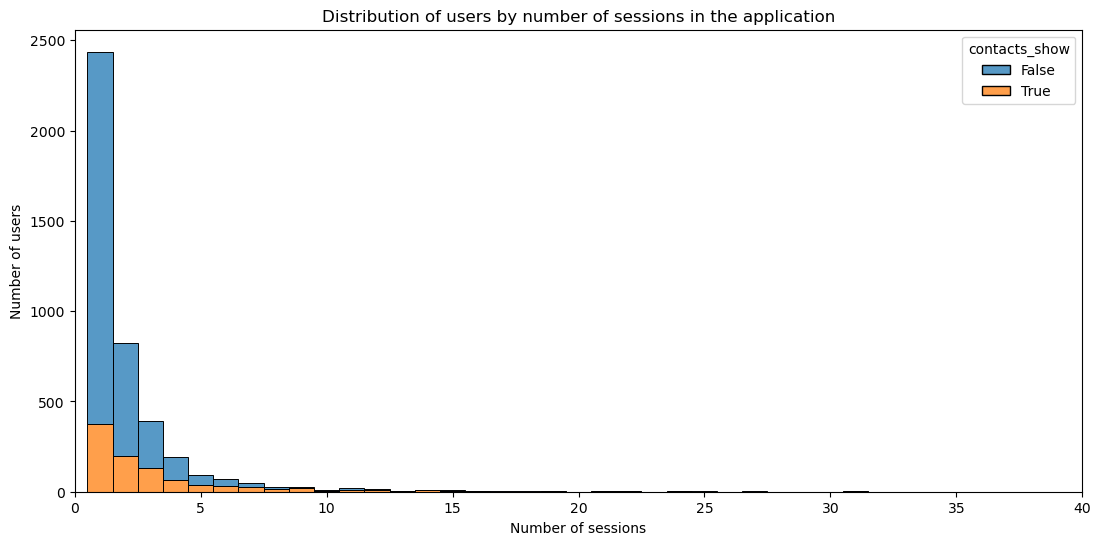

In [54]:
# construction of a histogram with distribution of users by the number of sessions in the application
plt.figure(figsize = (13, 6))
sns.histplot(x='session_num', data=users_profiles, hue='contacts_show', multiple='stack', discrete=True)
plt.xlabel('Number of sessions')
plt.ylabel('Number of users')
plt.title('Distribution of users by number of sessions in the application')
plt.xlim(0, 40)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    Most users have made one session in the app. However, in the group of users who have not committed the target event, this is the vast majority of users, and those who have 2 or more sessions are much less - almost three times less. And in the group who committed the target event, the difference in the number of users between 1 and 2-3 sessions is not so significant. This suggests that the users who committed the targeted action logged into the application more often and usually have up to three sessions.

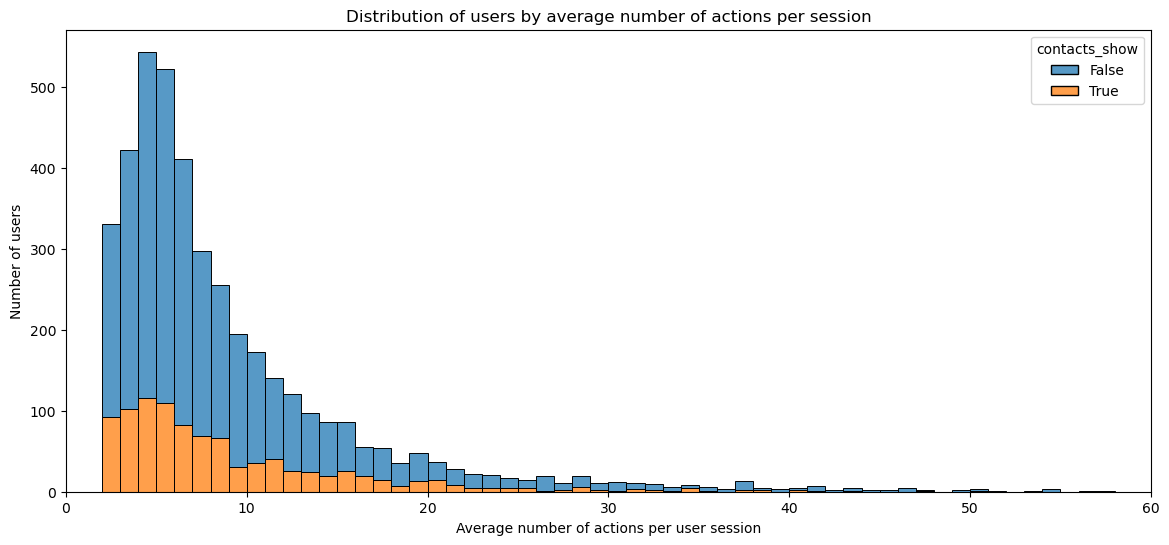

In [55]:
# construction of a histogram of user distribution by the average number of actions during one session
plt.figure(figsize = (14, 6))
sns.histplot(x='events_count', data=users_profiles, hue= 'contacts_show', multiple='stack', binwidth=1)
plt.xlabel('Average number of actions per user session')
plt.ylabel('Number of users')
plt.title('Distribution of users by average number of actions per session')
plt.xlim(0, 60)
plt.show() 

<div style="border:solid green 2px; padding: 20px">
    In both groups, users averaged 2-6 actions per session. According to this indicator, the behavior of users in the two groups is approximately the same. 

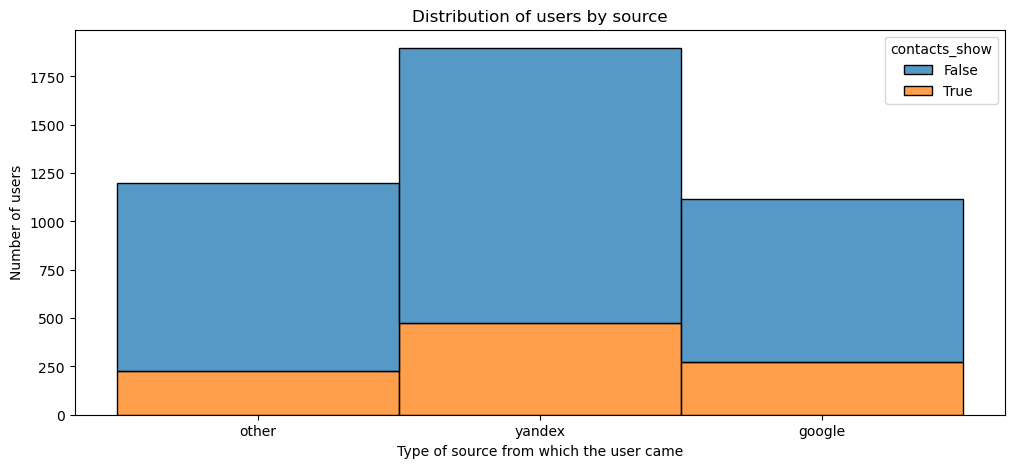

In [56]:
# construction of a histogram of user distribution by source type
plt.figure(figsize = (12, 5))
sns.histplot(x='source', data=users_profiles, hue= 'contacts_show', multiple='stack')
plt.xlabel('Type of source from which the user came')
plt.ylabel('Number of users')
plt.title('Distribution of users by source')
plt.show()

<div style="border:solid green 2px; padding: 20px">
The proportion of users who came to the app from google is greater among those who committed a target event, of the total number of users, than in the group of those who did not commit a target event. Otherwise, the groups are similar in this respect.

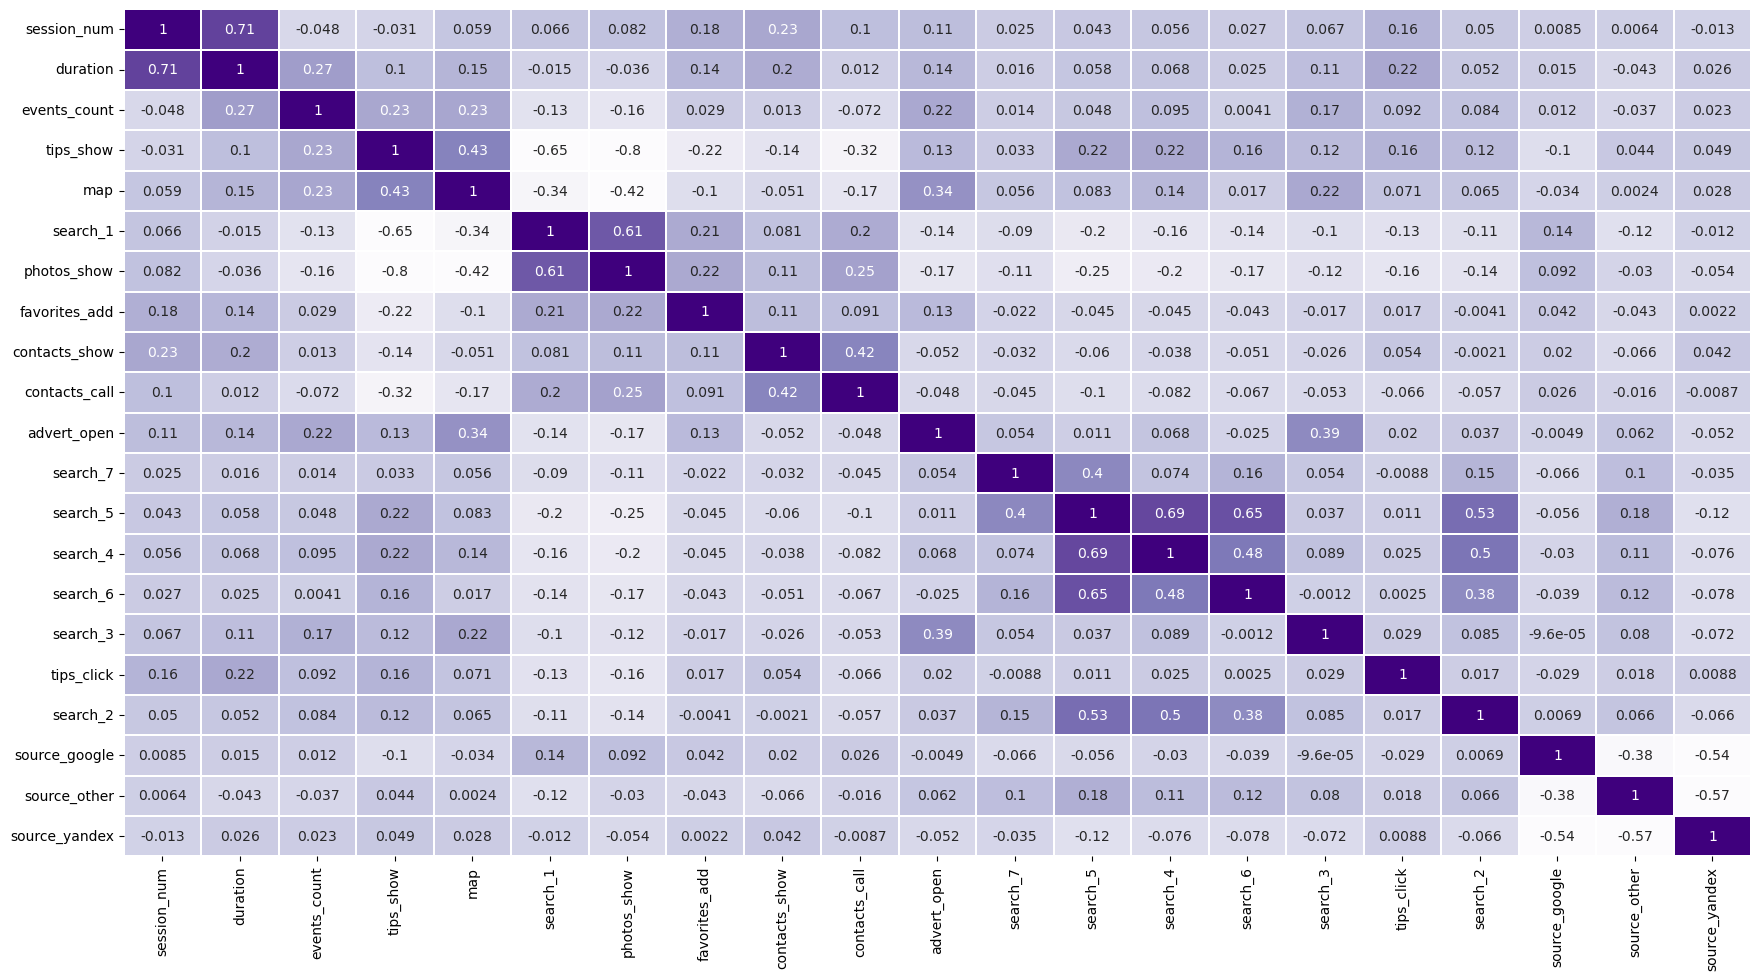

In [57]:
# converting the application installation source into an indicator for building the correlation matrix 
users_profiles = pd.get_dummies(users_profiles, columns=['source'])

# correlation matrix creation
plt.figure(figsize=(21, 11))
sns.heatmap(users_profiles.corr(), annot=True, cmap='Purples', cbar=False, robust=True, linewidths=.2)
plt.show()

<div style="border:solid green 2px; padding: 20px">
    Strong correlations are noticeable between total time spent in the app and number of sessions, 0.71; between viewing photos and search event #1, 0.61; between some search events; and between viewing the map and recommended ads, 0.43. A strong negative correlation is noticeable between viewing photos and recommended ads, -0.8; between viewing recommended ads and search event #1, -0.65. As for the target event of viewing contacts, no strong correlation is observed with any other attribute. A moderate correlation of 0.42 is observed with contacts_call. Source views do not have a strong correlation with other columns of the dataset either.

<div class="alert alert-success">

## 6 Building a sequence of events and calculating conversion

In [88]:
# function for making a list of unique events in order of their occurrence for each session
def sequence(data):
    return data['event_name'].unique().tolist()

# grouping data by user and applying the sequence function
path_data = (df_filtered.groupby(['user_id', 'session_id'])
                        .apply(sequence)
                        .reset_index(name='path'))

# adding a column with numbering of sessions for each user starting from 1
path_data['session_num'] = path_data.groupby('user_id').cumcount() + 1

path_data.drop(columns=['session_id'], inplace=True)
path_data.head(10)

,user_id,path,session_num
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,[tips_show],1
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,"[map, tips_show]",2
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,"[tips_show, map]",3
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,"[map, tips_show]",4
4,00157779-810c-4498-9e05-a1e9e3cedf93,"[search_1, photos_show]",1
5,00157779-810c-4498-9e05-a1e9e3cedf93,"[search_1, photos_show, favorites_add, contact...",2
6,00157779-810c-4498-9e05-a1e9e3cedf93,"[photos_show, advert_open]",3
7,00157779-810c-4498-9e05-a1e9e3cedf93,"[search_1, photos_show, contacts_show, contact...",4
8,00157779-810c-4498-9e05-a1e9e3cedf93,"[search_1, photos_show, contacts_show]",5
9,00157779-810c-4498-9e05-a1e9e3cedf93,[contacts_show],6


In [89]:
path_data['path'].value_counts().head(20)

[tips_show]                                  2647
[photos_show]                                1316
[search_1]                                    595
[map, tips_show]                              547
[search_1, photos_show]                       524
[tips_show, contacts_show]                    342
[tips_show, map]                              203
[contacts_show]                               189
[map, advert_open, tips_show]                 172
[tips_show, tips_click]                       162
[advert_open, tips_show]                      133
[advert_open]                                 133
[contacts_show, contacts_call]                120
[map]                                         118
[photos_show, search_1]                       105
[map, tips_show, contacts_show]                94
[photos_show, contacts_show]                   85
[contacts_show, tips_show]                     74
[search_4, search_6, search_5, tips_show]      68
[search_6, search_5, tips_show]                65


In [91]:
# counting the number of sessions in which contacts were shown
path_data['contacts_shown'] = False
path_data['contacts_shown'] = path_data['path'].apply(lambda x: ('contacts_show' in x))
display(path_data[path_data['contacts_shown']==True].head(10))
print(f'Number of sessions in which contacts have been viewed: {path_data.contacts_shown.sum()}')
print(f'Total sessions: {len(path_data)}')
print(f'Success rate of sessions: {path_data.contacts_shown.sum() / len(path_data):.2%}')

,user_id,path,session_num,contacts_shown
5,00157779-810c-4498-9e05-a1e9e3cedf93,"[search_1, photos_show, favorites_add, contact...",2,True
7,00157779-810c-4498-9e05-a1e9e3cedf93,"[search_1, photos_show, contacts_show, contact...",4,True
8,00157779-810c-4498-9e05-a1e9e3cedf93,"[search_1, photos_show, contacts_show]",5,True
9,00157779-810c-4498-9e05-a1e9e3cedf93,[contacts_show],6,True
17,00551e79-152e-4441-9cf7-565d7eb04090,"[contacts_show, contacts_call]",1,True
18,00551e79-152e-4441-9cf7-565d7eb04090,"[search_1, contacts_show, contacts_call]",2,True
22,005fbea5-2678-406f-88a6-fbe9787e2268,"[contacts_show, tips_show]",1,True
26,00753c79-ea81-4456-acd0-a47a23ca2fb9,[contacts_show],1,True
29,007d031d-5018-4e02-b7ee-72a30609173f,"[map, tips_show, contacts_show]",1,True
31,00a93a72-3bbc-4ee7-8a81-7134f45ae009,"[contacts_show, search_1]",1,True


Number of sessions in which contacts have been viewed: 1697
Total sessions: 10303
Success rate of sessions: 16.47%


In [92]:
path_data[path_data['contacts_shown']==True]['path'].value_counts().head(20)

[tips_show, contacts_show]                               342
[contacts_show]                                          189
[contacts_show, contacts_call]                           120
[map, tips_show, contacts_show]                           94
[photos_show, contacts_show]                              85
[contacts_show, tips_show]                                74
[search_1, contacts_show, contacts_call]                  54
[search_1, photos_show, contacts_show]                    45
[search_1, contacts_show]                                 42
[contacts_show, photos_show]                              38
[photos_show, contacts_show, contacts_call]               35
[contacts_show, contacts_call, photos_show]               26
[map, contacts_show, tips_show]                           25
[tips_show, contacts_show, tips_click]                    24
[tips_show, contacts_show, map]                           23
[tips_show, map, contacts_show]                           21
[tips_show, tips_click, 

<div style="border:solid green 2px; padding: 20px">
    The target action was performed in different sessions with different actions, so a strictly defined funnel of user actions cannot be built. In this case, the share of successful sessions in which contacts were viewed - 16.47% - can be taken as conversion rate.

In [93]:
print(f'Conversion by unique users: {users_profiles.contacts_show.sum() / len(users_profiles):.2%}')

Conversion by unique users: 23.09%


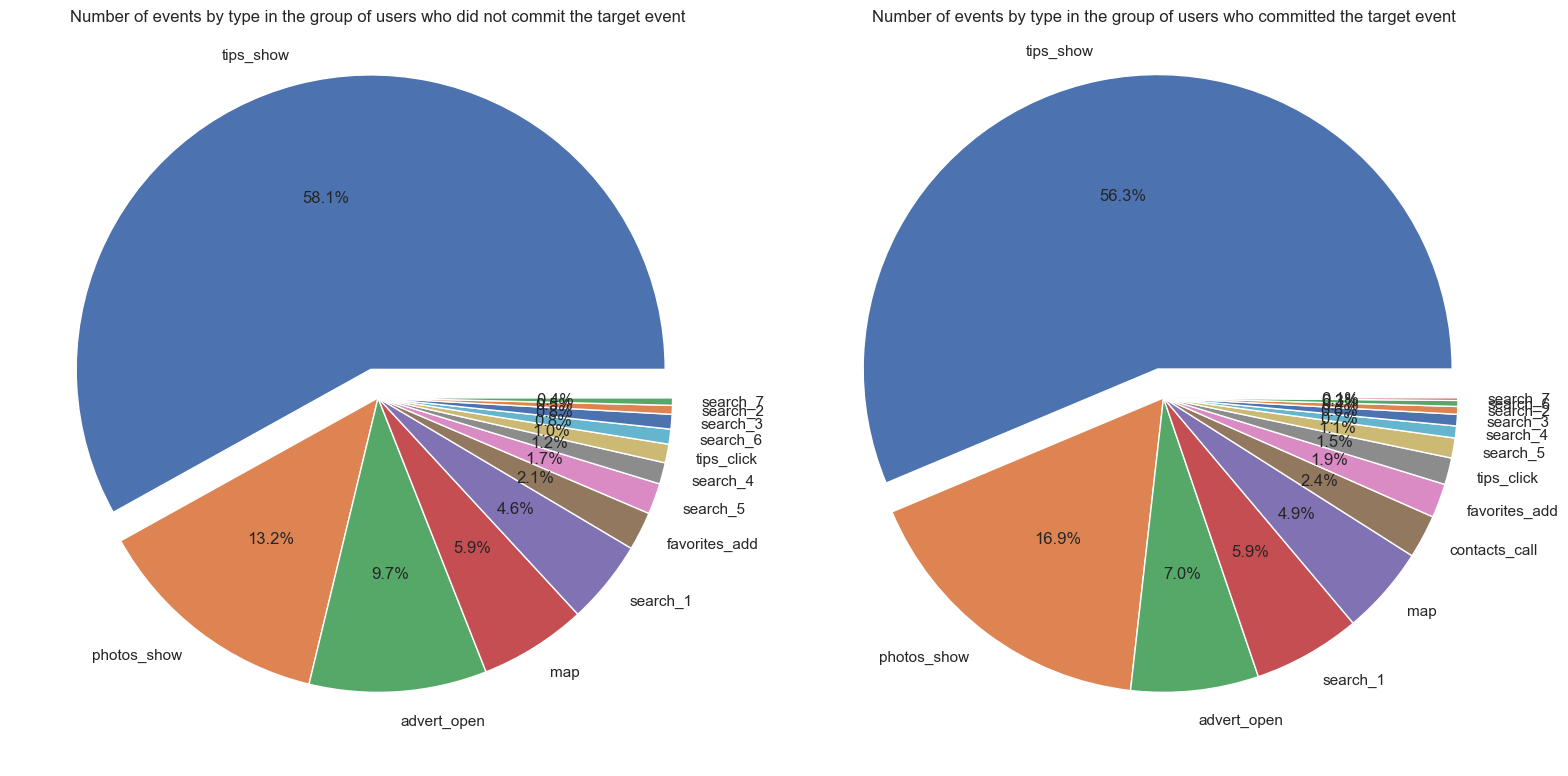

In [66]:
# create 2 tables - users and their actions, one with users who committed the target event, the other with the rest
without_target_event = df_filtered.query('user_id != @targeted_action_users_list')['event_name'].value_counts()
with_target_event = df_filtered.query('user_id == @targeted_action_users_list')['event_name'].value_counts()
with_target_event = with_target_event.drop(['contacts_show'])

# pie-chart comparison of the shares of events performed by users of two groups
# creating two pie charts on one line
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# first pie chart - group of users who have not committed the target event
axs[0].pie(without_target_event.values, labels=without_target_event.index, autopct='%1.1f%%', explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0))
axs[0].set_title('Number of events by type in the group of users who did not commit the target event')

# second pie chart - a group of users who committed the target event
axs[1].pie(with_target_event.values, labels=with_target_event.index, autopct='%1.1f%%', explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0))
axs[1].set_title('Number of events by type in the group of users who committed the target event')
sns.set()

plt.tight_layout()
plt.show()

<div style="border:solid green 2px; padding: 20px">
    In both the group of users who committed to a target event and the group who did not, the vast majority were more likely to view recommended ads. Those who took a targeted action were 3.7% more likely to view photos, but 2.7% less likely to open ad cards. Those in the committed group were more likely to perform a search query than to view an ad card. The opposite was true for the group without a targeted action.

In [94]:
# identifying the steps that precede a targeted action - from the compiled paths, extract the steps before viewing contacts, 
# and count which actions occur more frequently

# auxiliary table with paths to success only
success_paths = path_data.query('contacts_shown')[['path']].reset_index(drop=True)

# highlighting part of the path to success
success_paths['way'] = success_paths.apply(lambda row:row['path'][0:row['path'].index('contacts_show')], axis=1)

# a list of all steps before showing contacts
steps = pd.DataFrame(success_paths.way.sum(), columns =['events'])
steps['n'] = 1

# event grouping
steps.groupby('events')['n'].count().sort_values(ascending = False)

events
tips_show        701
map              238
photos_show      233
search_1         212
advert_open       97
search_5          85
favorites_add     53
search_4          53
search_6          32
search_2          31
tips_click        28
search_3          20
search_7           8
Name: n, dtype: int64

<div style="border:solid green 2px; padding: 20px">
    Thus, more often than not, users view recommended listings, a map with listings, photos, and use the search-1 feature before viewing contacts.

In [98]:
# the differences between successful and unsuccessful sessions 
(
    sessions
    .merge(path_data[['user_id', 'session_num', 'contacts_shown']], on=['user_id', 'session_num'])
    .groupby('contacts_shown').agg({'events_count':'mean', 'duration':'mean', 'lifetime':'mean'})
)

,events_count,duration,lifetime
contacts_shown,,,
False,8.270557,14.812325,2.657066
True,10.568714,21.697556,3.481951


<div style="border:solid green 2px; padding: 20px">
Thus, successful sessions have more action on average, are longer, and have more lifetime.

<div class="alert alert-success">

## 7 Evaluating the impact of other events on the target - view contacts

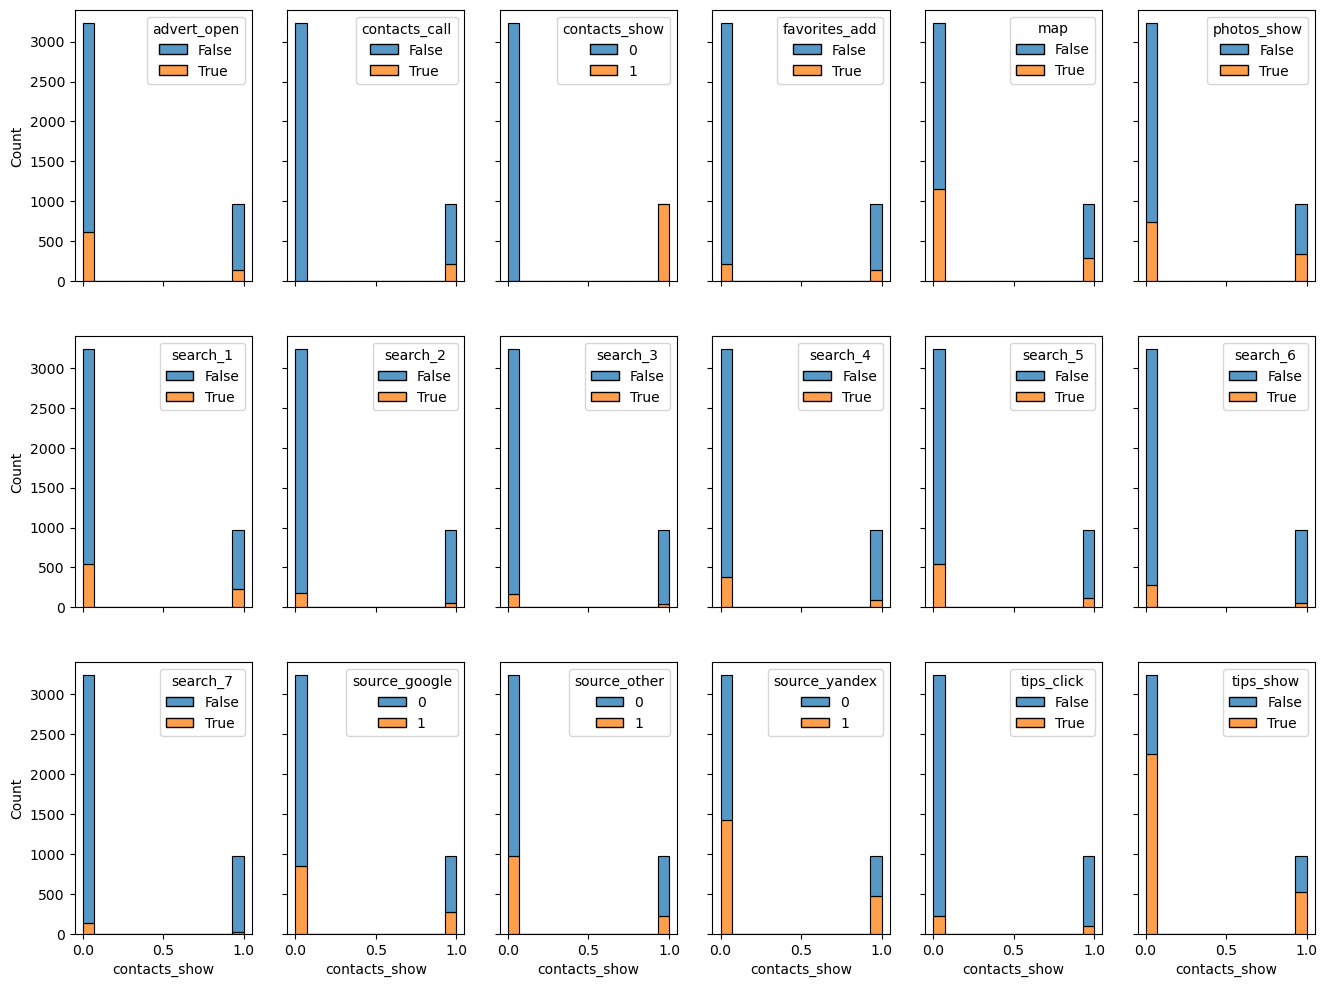

In [99]:
# binary distinction
col_bi = []
for col in users_profiles.columns.values:
    if users_profiles[col].max() == 1 or users_profiles[col].max() == True:
        col_bi.append(col)
col_bi = sorted(col_bi)

# plotting of graphs for each event with an indicator of whether the target event has been committed
figs, axes = plt.subplots(3, 6, sharey = True, sharex = True, figsize=(16, 12))
try:
    for i in range(len(col_bi)):
        sns.histplot(ax=axes[i//6, i%6], x='contacts_show', data=users_profiles, hue=col_bi[i], multiple='stack')
except:
    for i in range(len(col_bi)):
        users_profiles['contacts_show'] = users_profiles['contacts_show'] * 1
        sns.histplot(ax=axes[i//6, i%6], x='contacts_show', data=users_profiles, hue=col_bi[i], multiple='stack')
plt.show() 

<div style="border:solid green 2px; padding: 20px">
    
- All users who called sellers opened contacts. 
- About half of users who viewed contacts did not see recommended ads. 
- Those who did see contacts were more likely to add listings to their favorites and more likely to see photos. 
- Viewing the map, opening ads, clicking on recommended ads, and install source had no noticeable effect on viewing contacts.

In [100]:
(
    users_profiles.groupby('contacts_show')
    .agg({'favorites_add':'mean', 
          'photos_show':'mean', 
          'search_1':'mean', 
          'tips_click':'mean', 
          'session_num':'mean', 
          'duration':'mean', 'events_count':'mean'})
)

,favorites_add,photos_show,search_1,tips_click,session_num,duration,events_count
contacts_show,,,,,,,
0,0.066090,0.231007,0.167696,0.068561,1.846510,24.850638,8.924974
1,0.139918,0.347737,0.242798,0.102881,3.696502,54.579696,9.184323


<div style="border:solid green 2px; padding: 20px">
    On average, users who committed a targeted event were more likely to add an ad to their favorites, view a photo, take a search action, and click on a recommended ad. They also had a significantly higher number of sessions, duration, and number of in-app events.

<div class="alert alert-success">
    
## 8 Statistical hypothesis testing

### 8.1 Testing the first hypothesis - the effect of the source of the application installation

<div style="border:solid green 2px; padding: 20px">
    
    Some users installed the application via a link from yandex, others - from google. Let's test the hypothesis: these two groups show different conversion rates to contact views.
    
**Hypothesis H0**: there is no significant difference in conversion to target event between users who installed the app from different sources.
    
**Hypothesis H1**: there is a meaningful difference between users in conversion rate. 

To test the hypothesis, let's check the number of users who performed the target action (without taking into account the number of sessions).

In [107]:
target_source = (users_profiles
                 .merge(sources, on='user_id', how='left')
                 .pivot_table(index='source', 
                              values=['contacts_show', 'user_id'],
                              aggfunc={'user_id':'count','contacts_show':'sum'})
                )
target_source = target_source.rename(columns={'user_id' : 'total'})

# statistical comparison of shares 

alpha = 0.05 # critical level of statistical significance

stat, pval = proportions_ztest(np.array([target_source.loc['google', 'contacts_show'], 
                                         target_source.loc['yandex', 'contacts_show']]), 
                               np.array([target_source.loc['google', 'total'], 
                                         target_source.loc['yandex', 'total']]))
print('{0:0.3f}'.format(pval))

if (pval < alpha): 
        print("Reject the null hypothesis, there are statistically significant differences between the samples.")
else:
        print("Failed to reject the null hypothesis, there are no statistically significant differences in the samples.")

0.744
Failed to reject the null hypothesis, there are no statistically significant differences in the samples.


<div style="border:solid green 2px; padding: 20px">
    
**Conclusions on the first hypothesis:**

There is no statistical difference in conversion to contact views between users who registered with yandex and google.
The source does not influence the fulfillment of the target event.

### 8.2 Testing the second hypothesis is whether conversion to contact views of tips_show + tips_click events differs between tips_show and tips_show alone

<div style="border:solid green 2px; padding: 20px">
    
Some users perform tips_show and tips_click events, while others perform only tips_show. Testing the hypothesis about the difference in conversion to contact views between these two groups can be useful for evaluating the application's functionality.

**Hypothesis H0**: conversions to contact views between users who performed the tips_show and tips_click actions and users who performed only the tips_show action are equal.

**Hypothesis H1**: conversions in these user groups are different.

In [108]:
# determining the number of users based on these attributes
tips_show = df_filtered.query('event_name =="tips_show"')['user_id'].unique().tolist()
print('Total number of users who committed the event tips_show =', len(tips_show))
tips_show_click = df_filtered.query('event_name =="tips_click" and user_id==@tips_show')['user_id'].unique().tolist()
print('Number of users who committed events tips_show и tips_click =', len(tips_show_click))
only_tips_show = list(set(tips_show) - set(tips_show_click))
print('Number of users who committed only the event tips_show =', len(only_tips_show))

Total number of users who committed the event tips_show = 2771
Number of users who committed events tips_show и tips_click = 297
Number of users who committed only the event tips_show = 2474


In [110]:
# calculation of conversion to contact viewing for users of each group
# total number of users who took the tips_show action and viewed contacts
show = df_filtered.query('user_id==@tips_show')[['user_id', 'event_name']]
show_users=show[show['event_name']=="contacts_show"]['user_id'].nunique()
print('Number of users who made only the tips_show event and also viewed contacts =', show_users)

# the number of users who performed the actions tips_show and tips_click, as well as viewed contacts
show_click = df_filtered.query('user_id==@tips_show_click')[['user_id', 'event_name']]
show_click_users = show_click[show_click['event_name']=="contacts_show"]['user_id'].nunique()
print('Number of users who made tips_show + tips_click events and viewed contacts =', show_click_users)

# the number of users who have made only the tips_show event, as well as viewed contacts
print('Number of users who made only the tips_show event and also viewed contacts =', show_users - show_click_users)

Number of users who made only the tips_show event and also viewed contacts = 516
Number of users who made tips_show + tips_click events and viewed contacts = 91
Number of users who made only the tips_show event and also viewed contacts = 425


In [114]:
alpha = .05 # critical level of statistical significance

# success rate 
successes = np.array([show_click_users, show_users - show_click_users])

# total attempts
trials = np.array([len(tips_show_click), len(only_tips_show)])

# proportion of success in the first group
p1 = successes[0]/trials[0]

# proportion of success in the second group
p2 = successes[1]/trials[1]

# proportion of successes in the combined dataset
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# dataset aspect ratio difference
difference = p1 - p2

# calculation of statistics in st.deviations of standard normal distribution
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# definition of standard normal distribution (mean 0, standard deviation 1)
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-value: ', p_value)
if p_value < alpha:
    print('We reject the null hypothesis: there is a significant difference between the shares')
else:
    print('Failed to reject the null hypothesis, there is no reason to consider the fractions to be different')

p-value:  1.7927080486757063e-08
We reject the null hypothesis: there is a significant difference between the shares


<div style="border:solid green 2px; padding: 20px">
    
**Conclusion for the second hypothesis:**

Conversion to contact views differs between two groups of users, with one group of users performing tips_show and tips_click events and the other group performing only tips_show.
The types of tips_show and tips_click actions performed affect the views of the target event.

<div class="alert alert-success">
    
## General conclusions

<div style="border:solid green 2px; padding: 20px">
    
An audience study of the **Thrifted Stuff** app.
In the app, users sell their unwanted stuff by posting them on a bulletin board. The study of the service audience was conducted by the logs of user events in the application, made after 07.10.2019.
    
**The study consists of 8 sections:**

1. **In the 1st section**, the initial examination of the data was carried out. The aspects that need to be corrected in the next stage were identified.

2. **In section 2**, preprocessing of the data was carried out.
In this step, the column names of both datasets were brought to the same writing style, semantic duplicates (regarding user actions) were checked and eliminated, and the column with event dates was brought to the appropriate format. The original datasets were merged into one common dataset.

3. **In Section 3**, exploratory analysis of the data was conducted. 
- The data were checked for outliers. 
- Graphs of distribution of events by date, number of users by date, number of events by users, and number of target event occurrence by users were plotted.
- The mean, median and percentiles of the number of events, DAU and WAU metrics were calculated. 
- Removed users with a single event in the application for cleanliness of the analysis.
- The total amount of outliers was 37.5%, but given the limited source data and the impossibility of obtaining additional information (for example, about ongoing marketing campaigns to attract new users), it is impossible to assert with sufficient confidence that all the obtained anomalous results are outliers, so it was decided to leave them in the dataset for the analysis of user behavior.

4. **Section 4** allocated user sessions based on a 30 minute timeout between sessions. 
- The number of sessions, the average duration of each session, and the number of sessions per user were calculated. 
- Graphs of session distribution by date, number of events per session were plotted.
- 2023 sessions with zero duration were identified and deleted.
    
5. **Section 5** carried out the extraction of user profiles.
- The retention rate was calculated and heatmaps were built for all users and separately for groups of users who did or did not make a target action.
- The following graphs were created for the groups of users who did and did not perform the target action: distribution of time in the application by users, number of sessions, average number of events in a session, type of source, correlation matrix of all attributes.
    
6. **In Section 6**, the sequence of events and the conversion calculation were constructed.
- The events in each session are highlighted.
- The most popular events were identified.
- Events committed in sessions before the target event were found.
- Conversion by session and by unique users was determined.
- Determined differences in session duration, number of events, and Lifetime between the groups that did and did not commit to the target event. 
    
7. **Section 7** evaluated the impact of other events on the target event of viewing contacts. 
- A graph of distribution of other events depending on the occurrence of the target event was constructed.
- The average number of other events, duration of application use, number of sessions and number of events in the group of those who did and did not perform the target action were considered.
    
8. **Section 8** tested two hypotheses: the difference in the number of users who took a targeted action between the two sources; and the difference in conversions between users who took the tips_show + tips_click action or tips_show alone.
    
**Based on the study, the following conclusions can be drawn:**

- On average, 279 unique users access the mobile application per day, and around 1380 per week. Each of them performs an average of 13 events per week.

- The largest share of users installed the application through Yandex (45%).

- The most frequent event is "tips_show", which indicates that users have seen recommended ads. The proportion of this event is 54%, meaning that every other event performed by users is "tips_show".

- Events such as "photos_show" or viewing photos, "search" or search queries, and "advert_open" or opening an ad card are also popular. This indicates that users access the application with a specific purpose and search for a specific item, rather than relying on random suggestions (this is also confirmed by the fact that less than 10% of all users open recommended ads). It can also be assumed that ads with photos are viewed more frequently.

- User profile segmentation revealed that users who view contacts on the ad page are much more likely than other users to make phone calls to the number listed in the ad. If a user opens the contacts section, it can be said with a high probability that they are interested in purchasing the item and will make a call.
    
- Overall, users who have performed the target action are much more active within the application. They exhibit significantly higher retention rates, session durations, session counts, and event counts.
    
- Prior to viewing contacts, users most frequently perform actions such as "tips_show", "map", and "photos_show". It is these events that most often lead users to view contacts, which in turn leads to making phone calls. To improve the user experience in the application, it may be worth specifying in the rules that all ads are published only with photos.

- Hypothesis testing has shown that there are statistically significant differences in the conversion rates to viewing contacts between users who performed the "tips_show" event and the "tips_click" event, and those users who only performed the "tips_show" event. However, no statistically significant differences were found in the proportion of users who performed the target event among users who downloaded the application from different sources.
    
- Overall, the in-app retention rate is quite low (less than 10% on the seventh day), the conversion rate is also quite low. Only 22.7% of users make a target event. Perhaps users find it difficult to navigate the app or there are technical errors. The presence of 2,023 sessions with zero duration may also indicate this. Therefore, for further development of the application it is worth working on the interface, make it more user-friendly, simplify navigation, add hints, check the technical component, eliminate bugs.
    
**Based on the results of the conducted research, here are some recommendations for the app's development:**

- Considering that Yandex attracts the most users to the app (45%), followed by Google (26%), and others (28%), there is room for improvement in attracting users from various sources (such as advertising, social media, email campaigns).
- It has also been identified that users with longer app usage durations tend to return more frequently and stay longer, while users with shorter durations are more likely to abandon the app after initial use and not return. To retain users, it is recommended to simplify the tutorial, provide the option to use the app as a guest, reserve certain features for registered users only, and offer bonuses and rewards for active users.